Kim-Anh Laura Nguyen (3535002) & Elisabeth Mintchev (3302635)

# PROBLEMATIQUE 1 :                                        
# Les caractéristiques des équipes déterminent-elles l'issue du match?

In [1]:
# data_soccer comprend tous les dataframe fournis
from data_soccer import *
%matplotlib inline

## Partie 1 : description du problème

Dans cette première problématique, nous nous intéressons aux caractéristiques des équipes (fournies dans teamattributes.csv, dont le dataframe correspondant est team_attributes_pd). L'objectif est d'extraire des classes qui permettent de partitionner les équipes selon leur niveau. Par la suite, on pourra comparer le niveau des équipes pour prédire le vainqueur d'un match.
  
Nous avons observé la présence de valeurs manquantes dans les données correspondant aux attributs des équipes. Nous avons donc essayé d'enlever toutes les lignes contenant des valeurs NaN. Cependant, nous nous retrouvons avec trop peu de données et ne pouvions donc pas travailler dessus. Nous avons donc décidé de remplir ces valeurs manquantes par des valeurs moyennes.

### 1.1 Remplissage des valeurs NaN dans le dataframe correspondant aux attributs des équipes 

À chaque attribut numérique lié à une caractéristique de l'équipe, correspond un attribut catégoriel.  
Pour chaque attribut catégoriel, on récupère ses trois valeurs. Pour chacune de ces trois valeurs, on fait la moyenne de l'attribut numérique correspondant. 
Ainsi, pour chaque valeur catégorielle, on récupère toutes les lignes ayant la valeur numérique correspondante à NaN. On lui assigne la moyenne correspondant à sa valeur, calculée précédemment.

Par exemple, pour buildUpPlaySpeed, auquel correspond l'attribut catégoriel buildUpPlaySpeedClass :
- on sait que buildUpPlaySpeedClass peut prendre trois valeurs différentes (Balanced, Fast, Slow)
- pour chacune de ces trois valeurs, on calcule les moyennes en utilisant les données de la colonne buildUpPlaySpeed
- pour chaque ligne n'ayant pas de valeur pour buildUpPlaySpeed, on récupère sa valeur de buildUpPlaySpeedClass, et on lui attribue la moyenne calculée précédemment qui lui correspond.

In [2]:
team_attributes_pd_no_nan = team_attributes_pd.copy()

In [3]:
df_balanced = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlaySpeedClass'] == 'Balanced']
mean_balanced = df_balanced['buildUpPlaySpeed'].mean() # moyenne des buildUpPlaySpeed dont la classe est Balanced
team_attributes_pd_no_nan[(team_attributes_pd_no_nan['buildUpPlaySpeed'].isnull()) & (team_attributes_pd_no_nan['buildUpPlaySpeedClass'] == 'Balanced')]['buildUpPlaySpeed'] = mean_balanced

df_fast = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlaySpeedClass'] == 'Fast']
mean_fast = df_fast['buildUpPlaySpeed'].mean() 
team_attributes_pd_no_nan[(team_attributes_pd_no_nan['buildUpPlaySpeed'].isnull()) & (team_attributes_pd_no_nan['buildUpPlaySpeedClass'] == 'Fast')]['buildUpPlaySpeed'] = mean_fast

df_slow = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlaySpeedClass'] == 'Slow']
mean_slow = df_slow['buildUpPlaySpeed'].mean() 
team_attributes_pd_no_nan[(team_attributes_pd_no_nan['buildUpPlaySpeed'].isnull()) & (team_attributes_pd_no_nan['buildUpPlaySpeedClass'] == 'Slow')]['buildUpPlaySpeed'] = mean_slow

df_little = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlayDribblingClass'] == 'Little']
mean_little = df_little['buildUpPlayDribbling'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['buildUpPlayDribbling'].isnull()) & (team_attributes_pd_no_nan['buildUpPlayDribblingClass'] == 'Little'), 'buildUpPlayDribbling'] = mean_little

df_normal = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlayDribblingClass'] == 'Normal']
mean_normal = df_normal['buildUpPlayDribbling'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['buildUpPlayDribbling'].isnull()) & (team_attributes_pd_no_nan['buildUpPlayDribblingClass'] == 'Normal'), 'buildUpPlayDribbling'] = mean_normal

df_lots = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlayDribblingClass'] == 'Lots']
mean_lots = df_lots['buildUpPlayDribbling'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['buildUpPlayDribbling'].isnull()) & (team_attributes_pd_no_nan['buildUpPlayDribblingClass'] == 'Lots'), 'buildUpPlayDribbling'] = mean_lots

df_mixed = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlayPassingClass'] == 'Mixed']
mean_mixed = df_mixed['buildUpPlayPassing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['buildUpPlayPassing'].isnull()) & (team_attributes_pd_no_nan['buildUpPlayPassingClass'] == 'Mixed'), 'buildUpPlayPassing'] = mean_mixed

df_long = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlayPassingClass'] == 'Long']
mean_long = df_long['buildUpPlayPassing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['buildUpPlayPassing'].isnull()) & (team_attributes_pd_no_nan['buildUpPlayPassingClass'] == 'Long'), 'buildUpPlayPassing'] = mean_long

df_short = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['buildUpPlayPassingClass'] == 'Short']
mean_short = df_short['buildUpPlayPassing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['buildUpPlayPassing'].isnull()) & (team_attributes_pd_no_nan['buildUpPlayPassingClass'] == 'Short'), 'buildUpPlayPassing'] = mean_short

df_passing_normal = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationPassingClass'] == 'Normal']
mean_passing_normal = df_passing_normal['chanceCreationPassing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationPassing'].isnull()) & (team_attributes_pd_no_nan['chanceCreationPassingClass'] == 'Normal'), 'chanceCreationPassing'] = mean_passing_normal

df_safe = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationPassingClass'] == 'Safe']
mean_safe = df_safe['chanceCreationPassing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationPassing'].isnull()) & (team_attributes_pd_no_nan['chanceCreationPassingClass'] == 'Safe'), 'chanceCreationPassing'] = mean_safe

df_risky = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationPassingClass'] == 'Risky']
mean_risky = df_risky['chanceCreationPassing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationPassing'].isnull()) & (team_attributes_pd_no_nan['chanceCreationPassingClass'] == 'Risky'), 'chanceCreationPassing'] = mean_risky


df_crossing_normal = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationCrossingClass'] == 'Normal']
mean_crossing_normal = df_crossing_normal['chanceCreationCrossing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationCrossing'].isnull()) & (team_attributes_pd_no_nan['chanceCreationCrossingClass'] == 'Normal'), 'chanceCreationCrossing'] = mean_crossing_normal

df_crossing_lots = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationCrossingClass'] == 'Lots']
mean_crossing_lots = df_crossing_lots['chanceCreationCrossing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationCrossing'].isnull()) & (team_attributes_pd_no_nan['chanceCreationCrossingClass'] == 'Lots'), 'chanceCreationCrossing'] = mean_crossing_lots

df_crossing_little = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationCrossingClass'] == 'Little']
mean_crossing_little = df_crossing_little['chanceCreationCrossing'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationCrossing'].isnull()) & (team_attributes_pd_no_nan['chanceCreationCrossingClass'] == 'Little'), 'chanceCreationCrossing'] = mean_crossing_little

df_shooting_normal = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationShootingClass'] == 'Normal']
mean_shooting_normal = df_shooting_normal['chanceCreationShooting'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationShooting'].isnull()) & (team_attributes_pd_no_nan['chanceCreationShootingClass'] == 'Normal'), 'chanceCreationShooting'] = mean_shooting_normal

df_shooting_lots = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationShootingClass'] == 'Lots']
mean_shooting_lots = df_shooting_lots['chanceCreationShooting'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationShooting'].isnull()) & (team_attributes_pd_no_nan['chanceCreationShootingClass'] == 'Lots'), 'chanceCreationShooting'] = mean_shooting_lots

df_shooting_little = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['chanceCreationShootingClass'] == 'Little']
mean_shooting_little = df_shooting_little['chanceCreationShooting'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['chanceCreationShooting'].isnull()) & (team_attributes_pd_no_nan['chanceCreationShootingClass'] == 'Little'), 'chanceCreationShooting'] = mean_shooting_little

df_defence_medium = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defencePressureClass'] == 'Medium']
mean_defence_medium = df_defence_medium['defencePressure'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defencePressure'].isnull()) & (team_attributes_pd_no_nan['defencePressureClass'] == 'Medium'), 'defencePressure'] = mean_defence_medium

df_defence_deep = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defencePressureClass'] == 'Deep']
mean_defence_deep = df_defence_deep['defencePressure'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defencePressure'].isnull()) & (team_attributes_pd_no_nan['defencePressureClass'] == 'Deep'), 'defencePressure'] = mean_defence_deep

df_defence_high = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defencePressureClass'] == 'High']
mean_defence_high = df_defence_high['defencePressure'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defencePressure'].isnull()) & (team_attributes_pd_no_nan['defencePressureClass'] == 'High'), 'defencePressure'] = mean_defence_high

df_press = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defenceAggressionClass'] == 'Press']
mean_press = df_press['defenceAggression'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defenceAggression'].isnull()) & (team_attributes_pd_no_nan['defenceAggressionClass'] == 'Press'), 'defenceAggression'] = mean_press

df_double = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defenceAggressionClass'] == 'Double']
mean_double = df_double['defenceAggression'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defenceAggression'].isnull()) & (team_attributes_pd_no_nan['defenceAggressionClass'] == 'Double'), 'defenceAggression'] = mean_double

df_contain = team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defenceAggressionClass'] == 'Contain']
mean_contain = df_contain['defenceAggression'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defenceAggression'].isnull()) & (team_attributes_pd_no_nan['defenceAggressionClass'] == 'Contain'), 'defenceAggression'] = mean_contain

df_team_normal= team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defenceTeamWidthClass'] == 'Normal']
mean_team_normal = df_team_normal['defenceTeamWidth'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defenceTeamWidth'].isnull()) & (team_attributes_pd_no_nan['defenceTeamWidthClass'] == 'Normal'), 'defenceTeamWidth'] = mean_team_normal

df_team_wide= team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defenceTeamWidthClass'] == 'Wide']
mean_team_wide = df_team_wide['defenceTeamWidth'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defenceTeamWidth'].isnull()) & (team_attributes_pd_no_nan['defenceTeamWidthClass'] == 'Wide'), 'defenceTeamWidth'] = mean_team_wide

df_team_narrow= team_attributes_pd_no_nan.loc[team_attributes_pd_no_nan['defenceTeamWidthClass'] == 'Narrow']
mean_team_narrow = df_team_narrow['defenceTeamWidth'].mean() 
team_attributes_pd_no_nan.loc[(team_attributes_pd_no_nan['defenceTeamWidth'].isnull()) & (team_attributes_pd_no_nan['defenceTeamWidthClass'] == 'Narrow'), 'defenceTeamWidth'] = mean_team_narrow

On vérifie qu'il n'y a plus de valeur manquante : 

In [4]:
print(team_attributes_pd_no_nan.shape)
print("Données manquantes dans le dataframe original : ", team_attributes_pd.isnull().values.any())
print("Données manquantes dans le nouveau dataframe : ",team_attributes_pd_no_nan.isnull().values.any())
team_attributes_pd_no_nan.sample(3)

(1458, 26)
Données manquantes dans le dataframe original :  True
Données manquantes dans le nouveau dataframe :  False


,id,team_fifa_api_id,team_api_id,date,buildUpPlaySpeed,buildUpPlaySpeedClass,buildUpPlayDribbling,buildUpPlayDribblingClass,buildUpPlayPassing,buildUpPlayPassingClass,...,chanceCreationShootingClass,chanceCreationPositioningClass,defencePressure,defencePressureClass,defenceAggression,defenceAggressionClass,defenceTeamWidth,defenceTeamWidthClass,defenceDefenderLineClass,year
1045,1046,449,8603,2013-09-20 00:00:00,59,Balanced,30.485714,Little,37.0,Mixed,...,Normal,Organised,58.0,Medium,49.0,Press,58.0,Normal,Cover,2013
916,917,171,8165,2012-02-22 00:00:00,44,Balanced,30.485714,Little,49.0,Mixed,...,Normal,Organised,30.0,Deep,40.0,Press,43.0,Normal,Cover,2012
213,214,22,9789,2014-09-19 00:00:00,76,Fast,33.000000,Little,61.0,Mixed,...,Lots,Free Form,60.0,Medium,68.0,Double,43.0,Normal,Cover,2014


### 1.2 Préparation des données :

Grâce au dataframe précédent, on peut construire les vecteurs de représentation des équipes.  
Celui-ci est constitué, pour chaque équipe :  
- rating : une évaluation moyenne de l'équipe. Pour chaque année, on récupère tous les matchs joués par l'équipe, puis tous les joueurs ayant participé à ces matchs ainsi que leur évaluation (overall_rating) cette année là. On effectue ensuite la moyenne des évaluations obtenues au cours des années ;  
- des attributs de team_attributes_pd caractérisant les compétences de l'équipe    
- nb_wins : le nombre de matchs gagnés par l'équipe  
- winning_ratio : le pourcentage de gain de l'équipe, ie le nombre de matchs gagnés sur le nombre de matchs joués par l'équipe  

Les traitements étant longs, les vecteurs produits ont déjà été exportés sous forme csv, dans team_vectors_df.csv.

In [4]:
team_vectors_df = pd.read_csv("csv/team_vectors_df.csv")

In [6]:
team_vectors_df.drop(columns=['Unnamed: 0'], inplace=True)

Ce dataframe est généré par le code ci-dessous :

In [ ]:
###### A NE PAS EXECUTER CAR LE CSV EST DEJA EXPORTE ET CELA PREND DU TEMPS !!! #######

team_vectors = team_attributes_pd_no_nan.copy()

def get_overall_rating_home(row):
    date = row['year']
    rating = []
    players = row[['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9','home_player_10','home_player_11']]
    for p in players:
        df = player_attributes_pd.loc[(player_attributes_pd['player_api_id'] == p)] # caractéristiques du joueur sur toutes les années
        df_rating = df.loc[df['year']==date]['overall_rating']
        if not(df_rating.empty):
            rating.append(np.mean(df_rating)) # récupérer l'overall rating du joueur l'année où le match a été joué
    if rating != []:
        return np.median(np.array(rating))

def get_overall_rating_away(row):
    date = row['year']
    rating = []
    players = row[['away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9','away_player_10','away_player_11']]
    for p in players:
        df = player_attributes_pd.loc[(player_attributes_pd['player_api_id'] == p)] # caractéristiques du joueur sur toutes les années
        df_rating = df.loc[df['year']==date]['overall_rating']
        if not(df_rating.empty):
            rating.append(np.mean(df_rating)) # récupérer l'overall rating du joueur l'année où le match a été joué
    if rating != []:
        return np.median(np.array(rating))    

def rating(row):
    # tous les matchs joués par l'équipe
    match_played_home = match_pd.loc[(match_pd['home_team_api_id'] == row['team_api_id'])]
    match_played_away = match_pd.loc[(match_pd['away_team_api_id'] == row['team_api_id'])]
    overall_rating_team = []
    
    if not(match_played_home.empty):
        players = ['home_player_1', 'home_player_2', 'home_player_3', 'home_player_4', 'home_player_5', 'home_player_6', 'home_player_7', 'home_player_8', 'home_player_9','home_player_10','home_player_11']
        # récupérer les joueurs ayant joué chez eux
        match_played_players = match_played_home[['year'] + players]
        match_played_players['rating'] = match_played_players.apply(get_overall_rating_home, axis=1) # rating sur tous les matchs joués une année donnée
        overall_rating_team.append(match_played_players['rating'].mean())
        
    if not(match_played_away.empty):
        players = ['away_player_1', 'away_player_2', 'away_player_3', 'away_player_4', 'away_player_5', 'away_player_6', 'away_player_7', 'away_player_8', 'away_player_9','away_player_10','away_player_11']
        # récupérer les joueurs n'ayant pas joué chez eux
        match_played_players = match_played_away[['year'] + players]
        match_played_players['rating'] = match_played_players.apply(get_overall_rating_away, axis=1) # rating sur tous les matchs joués une année donnée
        overall_rating_team.append(match_played_players['rating'].mean())
        
    if not(match_played_away.empty and match_played_home.empty):
        return np.mean(np.array(overall_rating_team))
       

''' rating par équipe et par année '''        
team_vectors['rating'] = team_vectors.apply(rating, axis=1) 

''' grouper par team_api_id '''
team_vectors_gb = team_vectors.groupby(['team_api_id'])['rating']
team_vectors_gb_mean = team_vectors_gb.mean()

''' transformer en dataframe'''
team_vectors_df = team_vectors_gb_mean.to_frame()

''' remettre l'index à zéro '''
team_vectors_df = team_vectors_df.reset_index()


''' Rajouter buildUpPlaySpeed ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['buildUpPlaySpeed'].mean()

team_vectors_df['buildUpPlaySpeed'] = np.nan
team_vectors_df['buildUpPlaySpeed'] = team_vectors_df['team_api_id'].apply(f)


''' Rajouter buildUpPlayDribbling ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['buildUpPlayDribbling'].mean()

team_vectors_df['buildUpPlayDribbling'] = np.nan
team_vectors_df['buildUpPlayDribbling'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter buildUpPlayPassing ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['buildUpPlayPassing'].mean()

team_vectors_df['buildUpPlayPassing'] = np.nan
team_vectors_df['buildUpPlayPassing'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter chanceCreationPassing ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['chanceCreationPassing'].mean()

team_vectors_df['chanceCreationPassing'] = np.nan
team_vectors_df['chanceCreationPassing'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter chanceCreationCrossing ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['chanceCreationCrossing'].mean()

team_vectors_df['chanceCreationCrossing'] = np.nan
team_vectors_df['chanceCreationCrossing'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter chanceCreationShooting ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['chanceCreationShooting'].mean()

team_vectors_df['chanceCreationShooting'] = np.nan
team_vectors_df['chanceCreationShooting'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter defencePressure ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['defencePressure'].mean()

team_vectors_df['defencePressure'] = np.nan
team_vectors_df['defencePressure'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter defenceAggression ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['defenceAggression'].mean()

team_vectors_df['defenceAggression'] = np.nan
team_vectors_df['defenceAggression'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter defenceTeamWidth ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['defenceTeamWidth'].mean()

team_vectors_df['defenceTeamWidth'] = np.nan
team_vectors_df['defenceTeamWidth'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter buildUpPlayPositioningClass ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['buildUpPlayPositioningClass'].value_counts().argmax()
    
team_vectors_df['buildUpPlayPositioningClass'] = np.nan
team_vectors_df['buildUpPlayPositioningClass'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter chanceCreationPositioningClass ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['chanceCreationPositioningClass'].value_counts().argmax()
    
team_vectors_df['chanceCreationPositioningClass'] = np.nan
team_vectors_df['chanceCreationPositioningClass'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter defenceDefenderLineClass ''' 
def f(team_id):
    team = team_attributes_pd_no_nan[team_attributes_pd_no_nan.team_api_id == team_id]
    return team['defenceDefenderLineClass'].value_counts().argmax()
    
team_vectors_df['defenceDefenderLineClass'] = np.nan
team_vectors_df['defenceDefenderLineClass'] = team_vectors_df['team_api_id'].apply(f)

''' Rajouter le nombre de matchs gagnés ''' 
match_pd_count = match_pd.groupby(['winner'])['winner'].count()
match_count = match_pd_count.to_frame()
match_count = match_count.rename(index=str, columns={"winner": "nb_wins"})
match_count = match_count.reset_index()
match_count['winner'] = match_count['winner'].apply(pd.to_numeric)

def f(team_id):
    return match_count[match_count['winner'] == team_id]['nb_wins'].values.tolist()[0]
    
team_vectors_df['nb_wins'] = np.nan
team_vectors_df['nb_wins'] = team_vectors_df['team_api_id'].apply(f)

''' rajouter le ratio nb matchs gagnés sur nb matchs joués'''
def f(row):
    return row['nb_wins'] / (match_pd[match_pd['away_team_api_id'] == row['team_api_id']].shape[0] + match_pd[match_pd['home_team_api_id'] == row['team_api_id']].shape[0])
    
team_vectors_df['winning_ratio'] = np.nan
team_vectors_df['winning_ratio'] = team_vectors_df.apply(f, axis=1)

team_vectors_df.drop(columns=['nb_wins'], inplace=True)

''' Mettre team_api_id en index'''
team_vectors_df = team_vectors_df.set_index("team_api_id")

team_vectors_df.sort_values(by=['winning_ratio'],ascending=False)

''' Export de la base '''
team_vectors_df.to_csv('team_vectors_df.csv')

In [7]:
team_vectors_df.sample(5)

,team_api_id,rating,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass,winning_ratio
149,8674,68.980042,47.166667,32.657143,41.500000,51.000000,59.000000,52.333333,44.833333,43.666667,48.500000,Organised,Organised,Cover,0.400735
69,8357,69.455882,59.833333,40.323810,45.666667,50.666667,51.000000,50.833333,46.666667,52.833333,56.666667,Organised,Organised,Cover,0.117647
171,9788,74.472104,53.833333,37.990476,43.166667,51.000000,44.833333,51.500000,42.333333,48.666667,45.500000,Organised,Organised,Cover,0.400735
220,9906,79.463831,53.166667,37.323810,47.833333,64.666667,62.666667,60.000000,55.500000,39.166667,54.333333,Organised,Organised,Cover,0.549342
260,10214,69.084900,46.666667,39.990476,38.666667,55.333333,52.666667,52.000000,41.166667,44.833333,51.000000,Organised,Organised,Cover,0.379032


### 1.3 Test de corrélation entre la proportion de matchs gagnés et les attributs des équipes

Pour évaluer la pertinence des attributs de team_vectors_df, on effectue des tests de corrélation avec winning_ratio, le pourcentage de matchs gagnés :

#### Attribut builUpPlaySpeed :

0.0212713399375


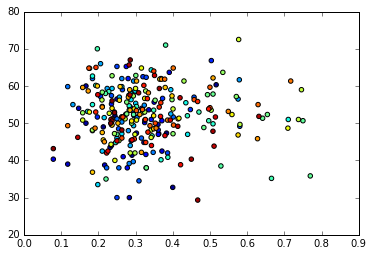

In [8]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['buildUpPlaySpeed']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["buildUpPlaySpeed"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

#### Attribut builUpPlayDribbling :

0.0494581076168


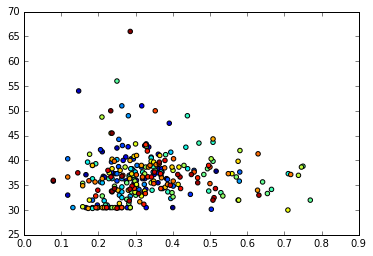

In [9]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['buildUpPlayDribbling']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["buildUpPlayDribbling"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

#### Attribut buildUpPlayPassing :

-0.29495561727


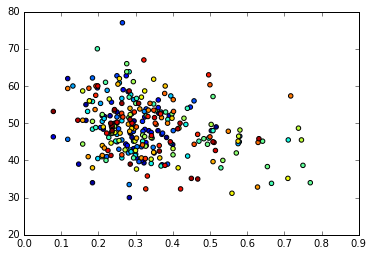

In [10]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['buildUpPlayPassing']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["buildUpPlayPassing"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

0.149715042262


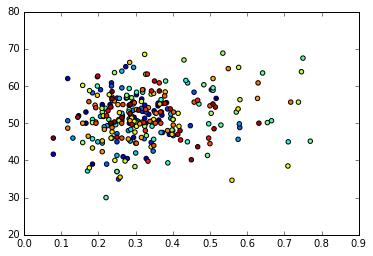

In [11]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['chanceCreationPassing']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["chanceCreationPassing"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

0.106367866426


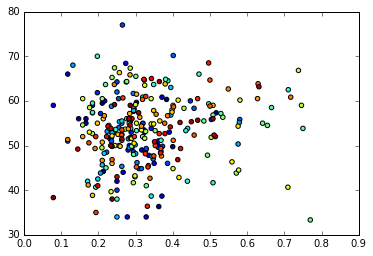

In [12]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['chanceCreationCrossing']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["chanceCreationCrossing"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

0.174015824271


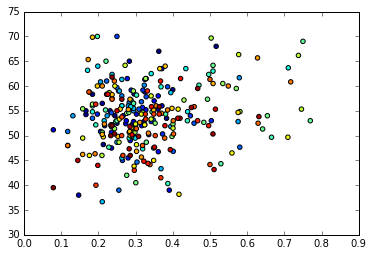

In [13]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['chanceCreationShooting']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["chanceCreationShooting"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

0.341007809624


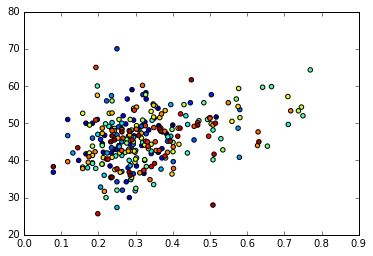

In [14]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['defencePressure']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["defencePressure"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

0.165466239026


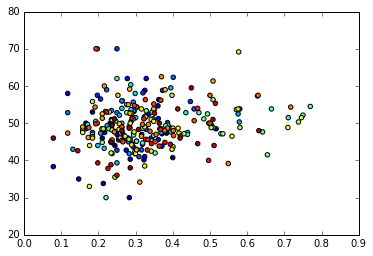

In [15]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['defenceAggression']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["defenceAggression"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

0.112911821327


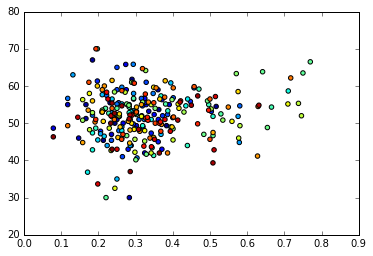

In [16]:
print(team_vectors_df['winning_ratio'].corr(team_vectors_df['defenceTeamWidth']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["defenceTeamWidth"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

Séparément, les caractériques des équipes n'ont pas de réelle influence sur l'issue du match - ainsi nous ne retenons pas les caractéristiques individuellement.
Mais cela ne veut pas dire que, ensemble, elles ne sont pas déterminantes.

Corrélation pour rating :  0.490672570304


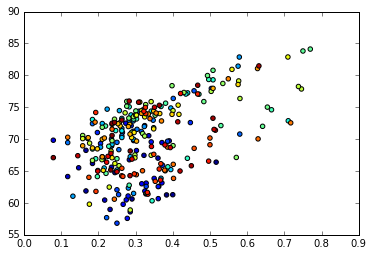

In [17]:
print("Corrélation pour rating : " , team_vectors_df['winning_ratio'].corr(team_vectors_df['rating']))

N = len(team_vectors_df.index)
x = team_vectors_df["winning_ratio"]
y = team_vectors_df["rating"]
colors = range(N)

plt.scatter(x, y, c=colors)
plt.show()

On remarque une corrélation plus importante entre le score global d'une équipe (moyenne des scores attribués à ses joueurs au fil du temps) et la fréquence de matchs gagnés.

### 1.4 Détermination d'une bonne valeur pour le nombre de clusters de la partition

On cherche à partitionner nos données en plusieurs groupes qui définiraient les classes du modèle d'apprentissage (par exemple: équipes très bonnes/moyennes/mauvaises).  
Pour cela, on applique l'algorithme des k-means pour K=2,...,10. On évalue ensuite chaque clustering obtenu en utilisant les index de Dunn et Xie et Beni. On choisit alors la valeur de K qui minimise la valeur de l'index.

In [161]:
from kmoyennes import *

In [312]:
team_vectors_df_norm = team_vectors_df.copy()
team_vectors_df_norm.drop('team_api_id', axis=1, inplace=True)
team_vectors_df_norm.drop('winning_ratio', axis=1, inplace=True)

team_vectors_df_norm.reset_index(inplace=True)
team_vectors_df_norm.drop('index', axis=1, inplace=True)
team_vectors_df_norm.head()

,rating,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass
0,61.252819,47.333333,36.323810,46.166667,55.500000,60.333333,53.5,47.166667,47.333333,49.333333,Organised,Organised,Cover
1,64.754444,52.000000,37.323810,50.000000,50.000000,53.000000,54.0,43.000000,44.000000,50.000000,Organised,Organised,Cover
2,62.598241,47.166667,38.323810,52.666667,50.833333,36.333333,67.0,49.333333,56.333333,53.666667,Organised,Organised,Cover
3,66.852778,49.000000,36.788571,48.400000,51.800000,44.200000,48.2,42.200000,33.800000,45.400000,Organised,Free Form,Cover
4,66.389930,60.333333,37.823810,49.000000,56.666667,57.333333,68.0,51.666667,48.500000,54.500000,Organised,Organised,Cover


On normalise le dataframe pour pouvoir appliquer le clustering:

In [313]:
team_vectors_df_norm = normalisation(team_vectors_df_norm)
team_vectors_df_norm.sample(3)

,rating,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass
287,0.30573,0.478764,0.555673,0.425532,0.515021,0.381679,0.4,0.43609,0.375,0.5,0,0,0
259,0.440489,0.339768,0.185136,0.35461,0.738197,0.725191,0.575,0.285714,0.3625,0.341667,0,0,0
37,0.140975,0.409266,0.312483,0.558511,0.650215,0.40458,0.3025,0.37406,0.53125,0.525,0,0,0


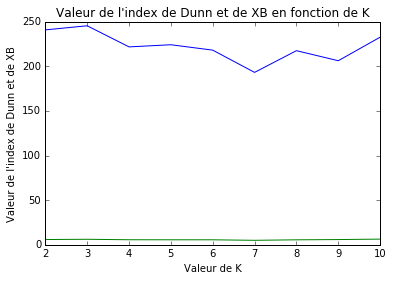

In [314]:
dunn_list = []
XB_list = []

for K in range(2, 11):
    dunn = 0
    XB = 0
    for i in range(5):
        medoides, dict_affect, J = kmoyennes(K, team_vectors_df_norm, 0.05, 100)
        dunn += evaluation("Dunn",team_vectors_df_norm,medoides,dict_affect)
        XB += evaluation("XB",team_vectors_df_norm,medoides,dict_affect)
    dunn = dunn / 5*1.0
    XB = XB / 5*1.0
    dunn_list.append(dunn)
    XB_list.append(XB)
  
plt.plot(np.arange(2,11), XB_list)
plt.plot(np.arange(2, 11), dunn_list)
plt.xlabel("Valeur de K")
plt.ylabel("Valeur de l'index de Dunn et de XB")
plt.title("Valeur de l'index de Dunn et de XB en fonction de K")

plt.show()

In [315]:
for k in range(2, 11):
    print("K = ", k)
    print("valeur de l'index de Xie et Beni : ", XB_list[k-2]) 
    print("valeur de l'index de Dunn : ", dunn_list[k-2])

K =  2
valeur de l'index de Xie et Beni :  240.730459509
valeur de l'index de Dunn :  5.90307498816
K =  3
valeur de l'index de Xie et Beni :  245.325202563
valeur de l'index de Dunn :  6.18204184772
K =  4
valeur de l'index de Xie et Beni :  221.672452821
valeur de l'index de Dunn :  5.66337311215
K =  5
valeur de l'index de Xie et Beni :  224.082109734
valeur de l'index de Dunn :  5.61631359831
K =  6
valeur de l'index de Xie et Beni :  218.037248763
valeur de l'index de Dunn :  5.61007543805
K =  7
valeur de l'index de Xie et Beni :  193.114307028
valeur de l'index de Dunn :  5.02655888773
K =  8
valeur de l'index de Xie et Beni :  217.432854882
valeur de l'index de Dunn :  5.58698142562
K =  9
valeur de l'index de Xie et Beni :  206.182219001
valeur de l'index de Dunn :  5.86499278714
K =  10
valeur de l'index de Xie et Beni :  232.550519778
valeur de l'index de Dunn :  6.37211769196


In [316]:
print("Nombre de clusters donnant la meilleure partition avec l'index de Xie et Beni : ", 2+np.argmin(np.array(XB_list)))
print("Nombre de clusters donnant la meilleure partition avec l'index de Dunn : ", 2+np.argmin(np.array(dunn_list)))

Nombre de clusters donnant la meilleure partition avec l'index de Xie et Beni :  7
Nombre de clusters donnant la meilleure partition avec l'index de Dunn :  7


D'après les résultats obtenus, la meilleure partition selon le critère de compacité inertielle et compacité intra-clusters est obtenue avec 9 clusters.

## Partie 2 : Modèle

Étant donné la présence d'attributs catégoriels dans nos vecteurs de description, il est plus intuitif pour nous d'utiliser l'arbre de décision. En effet, les valeurs de l'attribut catégoriel définissent les coupures. De plus, ce modèle d'apprentissage peut naturellement traiter la classification multi-labels (les feuilles de l'arbre représentent les K classes définies).  

Notre modèle apprend à partir d'une base de données constituée des vecteurs des équipes. Cette base de données est formée d'équipes appartenant aux différentes classes.
Notre apprentissage consiste en la détermination de la classe d'une équipe.  
Ainsi, lors de la prédiction de l'issue d'un match, il s'effectuera une comparaison entre l'equipe home et l'équipe away.
Le modèle est lancé sur les deux équipes et détermine le label de chaque équipe. Si le modèle prédit que l'equipe home (resp. away) est meilleure que l'équipe away (resp.home) et que le résultat du match le confirme, c'est une bonne prédiction. Si le modèle estime que les deux équipes se trouvent dans la même classe, et qu'il y a égalité, c'est aussi une bonne prédiction. Dans tous les autres cas, la prédiction est incorrecte.

## Partie 3 : Code

On reprend le code de l'arbre de décision implémenté en TP, en ajoutant quelques modifications :  
- prise en compte des attributs catégoriels 
- prédiction multi-labels

In [2]:
from math import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import graphviz as gv
import numbers

########## LABELEDSET ##########

class LabeledSet:  
    
    def __init__(self, input_dimension):
        self.input_dimension = input_dimension
        self.nb_examples = 0
    
    def addExample(self,vector,label):
        if (self.nb_examples == 0):
            self.x = np.array([vector])
            self.y = np.array([label])
        else:
            self.x = np.vstack((self.x, vector))
            self.y = np.vstack((self.y, label))
        
        self.nb_examples = self.nb_examples + 1
    
    #Renvoie la dimension de l'espace d'entrée
    def getInputDimension(self):
        return self.input_dimension
    
    #Renvoie le nombre d'exemples dans le set
    def size(self):
        return self.nb_examples
    
    #Renvoie la valeur de x_i
    def getX(self, i):
        return self.x[i]
        
    
    #Renvoie la valeur de y_i
    def getY(self, i):
        return(self.y[i])
    

def plot2DSet(set):
    """ LabeledSet -> NoneType
        Hypothèse: set est de dimension 2
        affiche une représentation graphique du LabeledSet
        remarque: l'ordre des labels dans set peut être quelconque
    """
    S_pos = set.x[np.where(set.y == 1),:][0]      # tous les exemples de label +1
    S_neg = set.x[np.where(set.y == -1),:][0]     # tous les exemples de label -1
    plt.scatter(S_pos[:,0],S_pos[:,1],marker='o')
    plt.scatter(S_neg[:,0],S_neg[:,1],marker='x')
    
##################################

########## CLASSIFIEURS ##########

class Classifier:
    def __init__(self,input_dimension):
        """ Constructeur """
        raise NotImplementedError("Please Implement this method")
    
    
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        raise NotImplementedError("Please Implement this method")

    
    # Permet d'entrainer le modele sur un ensemble de données étiquetés
    def train(self,labeledSet):
        raise NotImplementedError("Please Implement this method")
    
    # Permet de calculer le taux de bonne classification
    def accuracy(self,set):
        nb_ok=0
        for i in range(set.size()):
            score = self.predict(set.getX(i))
            if (score*set.getY(i)>0):
                nb_ok = nb_ok+1
        acc = nb_ok/(set.size() * 1.0)
        return acc    
    
def plot_frontiere(set,classifier,step=10):
    """ LabeledSet * Classifier * int -> NoneType
        Remarque: le 3e argument est optionnel et donne la "résolution" du tracé
        affiche la frontière de décision associée au classifieur
    """
    mmax=set.x.max(0)
    mmin=set.x.min(0)
    x1grid,x2grid=np.meshgrid(np.linspace(mmin[0],mmax[0],step),np.linspace(mmin[1],mmax[1],step))
    grid=np.hstack((x1grid.reshape(x1grid.size,1),x2grid.reshape(x2grid.size,1)))
    
    # calcul de la prediction pour chaque point de la grille
    res=np.array([classifier.predict(grid[i,:]) for i in range(len(grid)) ])
    res=res.reshape(x1grid.shape)
    # tracer des frontieres
    plt.contourf(x1grid,x2grid,res,colors=["red","cyan"],levels=[-1000,0,1000],linewidth=2)

######################################################    
    
########### Entropie et gain d'information ###########
    
def classe_majoritaire(labeledSet, labels):
    classes_sizes = []
    #print(labeledSet.y.tolist())
    for label in labels:
        classes_sizes.append(len(labeledSet.x[np.where(labeledSet.y == label),:][0]))
    
    #print(classes_sizes)
    return labels[np.argmax(np.array(classes_sizes))]
    
    
def shannon(P):
    Hs = 0
    k = len(P)
    for p_i in P:
        tmp = 0
        if p_i != 0:
            tmp = p_i * log(p_i, k)
        Hs += tmp
    
    #print(P, -Hs)
    return -Hs

def entropie(labeledSet, labels):
    P = []
    # récupérer la distribution des classes
    for label in labels:
        P.append(len(labeledSet.x[np.where(labeledSet.y == label),0:labeledSet.getInputDimension()][0]) / (1.0 * labeledSet.size()))
    
    # calcul de l'entropie de shannon
    return shannon(P)

########### Discrétisation des attributs numériques ###########

def discretise(LSet, col, labels):
    """ LabelledSet * int -> tuple[float, float]
        col est le numéro de colonne sur X à discrétiser
        rend la valeur de coupure qui minimise l'entropie ainsi que son entropie.
    """
    # initialisation:
    min_entropie = 1.1  # on met à une valeur max car on veut minimiser
    min_seuil = 0.0     
    # trie des valeurs:
    ind= np.argsort(LSet.x,axis=0)
    
    # calcul des distributions des classes pour E1 et E2:
    
    inf_labels = [0 for i in range(len(labels))]
    sup_labels = [0 for i in range(len(labels))]
         
    # remarque: au départ on considère que E1 est vide et donc E2 correspond à E. 
    # Ainsi inf_plus et inf_moins valent 0. Il reste à calculer sup_plus et sup_moins 
    # dans E.
    for j in range(0,LSet.size()):
        l = LSet.getY(j)[0]
        i = labels.index(l)
        sup_labels[i] += 1
        
    nb_total = 0
    for v in sup_labels:
        nb_total += v
    # nombre d'exemples total dans E
    
    # parcours pour trouver le meilleur seuil:
    for i in range(len(LSet.x)-1):
        v_ind_i = ind[i]   # vecteur d'indices (ind_x1, ind_x2, ...)
        courant = LSet.getX(v_ind_i[col])[col] # récupérer la valeur de l'attribut col  correspondant à l'indice
        lookahead = LSet.getX(ind[i+1][col])[col] # la valeur qui suit
        val_seuil = (courant + lookahead) / 2.0; # le seuil
        # M-A-J de la distrib. des classes:
        # pour réduire les traitements: on retire un exemple de E2 et on le place
        # dans E1, c'est ainsi que l'on déplace donc le seuil de coupure.
        l = LSet.getY(ind[i][col])[0]# label
        
        indice = labels.index(l) # indice dans la liste de labels
        
        inf_labels[indice] += 1
        sup_labels[indice] -= 1
        
        
        # calcul de la distribution des classes de chaque côté du seuil:
        nb_inf = 0
        for v in inf_labels:
            nb_inf += v
        nb_inf *= 1.0
        
        nb_sup = 0
        for v in sup_labels:
            nb_sup += v
        nb_sup *= 1.0
        
        P_inf = []
        for v in inf_labels:
            P_inf.append(v/nb_inf)
        val_entropie_inf = shannon(P_inf)
        #print("entropie inf: ", val_entropie_inf)
        
        P_sup = []
        for v in sup_labels:
            P_sup.append(v/nb_sup)
        val_entropie_sup = shannon(P_sup)
        #print("entropie sup : ", val_entropie_sup)
        val_entropie = (nb_inf / nb_total) * val_entropie_inf + (nb_sup / nb_total) * val_entropie_sup
        #print("entropie : ", val_entropie)
        # si cette coupure minimise l'entropie, on mémorise ce seuil et son entropie:
        if (min_entropie > val_entropie):
            min_entropie = val_entropie
            min_seuil = val_seuil
    #print("min entropie : ", min_entropie)
    return (min_seuil, min_entropie)

def divise(Lset, att, seuil):
    E1 = LabeledSet(Lset.input_dimension)
    E2 = LabeledSet(Lset.input_dimension)
    
    ind= np.argsort(Lset.x,axis=0) # trie les valeurs => ind = tableau des indices
    lookahead = -1
    
    # Séparation des données selon le seuil
    for i in range(Lset.size()):
        if Lset.getX(i)[att] <= seuil:
            E1.addExample(Lset.getX(i), Lset.getY(i))
        else:
            E2.addExample(Lset.getX(i), Lset.getY(i))
    
    return E1, E2

#################################################

########### Représentation d'un arbre ###########

class ArbreBinaire:
    def __init__(self):
        self.attribut = None   # numéro de l'attribut
        self.seuil = None
        self.inferieur = None # ArbreBinaire Gauche (valeurs <= au seuil)
        self.superieur = None # ArbreBinaire Gauche (valeurs > au seuil)
        self.classe = None # Classe si c'est une feuille
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return self.seuil == None
    
    def ajoute_fils(self,ABinf,ABsup,att,seuil):
        """ ABinf, ABsup: 2 arbres binaires
            att: numéro d'attribut
            seuil: valeur de seuil
        """
        self.attribut = att
        self.seuil = seuil
        self.inferieur = ABinf
        self.superieur = ABsup
    
    def ajoute_feuille(self,classe):
        """ classe
        """
        self.classe = classe
        
    def classifie(self,exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple
        """
        if self.est_feuille():
            return self.classe
        if exemple[self.attribut] <= self.seuil:
            return self.inferieur.classifie(exemple)
        return self.superieur.classifie(exemple)
    
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.attribut))
            self.inferieur.to_graph(g,prefixe+"g")
            self.superieur.to_graph(g,prefixe+"d")
            g.edge(prefixe,prefixe+"g", '<='+ str(self.seuil))
            g.edge(prefixe,prefixe+"d", '>'+ str(self.seuil))
        
        return g 

#################################################################### 

########### Arbre de décision avec attributs catégoriels ###########

def divise_categoriel(Lset, att, categories):
    nb_cat = len(categories)
    E = [LabeledSet(Lset.getInputDimension()) for k in range(nb_cat)]

    
    n = Lset.size()             

    # Séparation des données selon l'attribut catégoriel
    for i in range(n):
        k = categories.index(Lset.getX(i)[att]) 
        E[k].addExample(Lset.getX(i), Lset.getY(i))         

    return E

def entropie_categorielle(LSet, col, categories, labels):
    distribution = [list() for i in range(len(labels))]
    
    #print("categories : ", categories)
    #print("labels : ", labels)
    
    for c in categories:
        nb_label_attr = []
        n = 0
        for i in range(len(labels)):
            l = labels[i]
            label_array = LSet.x[(np.where(LSet.y == l)), 0:LSet.getInputDimension()][0] 
            label_attr = label_array[np.where(label_array[:,col] == c)]
            nb_label_attr.append(len(label_attr))
            n += len(label_attr)
        for i in range(len(labels)):
            distribution[i].append(nb_label_attr[i] / (1.0 * n))
    
    #print(distribution)
    min_entropie = 1.1
    for i in range(len(categories)):
        P = []
        for j in range(len(labels)):
            P.append(distribution[j][i])
        #print(P)
        entro = shannon(P)
        if min_entropie > entro:
            min_entropie = entro
    return min_entropie

class ArbreCategoriel:
    def __init__(self):
        self.attribut = None   # numéro de l'attribut
        
        # arbre générique : attribut catégoriel
        self.fils = None

        self.classe = None # Classe si c'est une feuille: -1 ou +1
        
    def est_feuille(self):
        """ rend True si l'arbre est une feuille """
        return self.attribut == None
    
    
    def ajoute_fils(self,fils,att):
        """ fils: dictionnaire clé=catégorie, valeur=arbre
            att: numéro d'attribut
        """
        self.attribut = att
        self.fils = fils
    
    def ajoute_feuille(self,classe):
        """ classe
        """
        self.classe = classe
        
    def classifie(self,exemple):
        """ exemple : numpy.array
            rend la classe de l'exemple
        """
        if self.est_feuille():
            return self.classe
        else:
            for c,f in self.fils.items():
                if c == exemple[self.attribut]:
                    return f.classifie(exemple)
                
            
    def to_graph(self, g, prefixe='A'):
        """ construit une représentation de l'arbre pour pouvoir
            l'afficher
        """
        if self.est_feuille():
            g.node(prefixe,str(self.classe),shape='box')
        else:
            g.node(prefixe, str(self.attribut))
            
            for c, f in self.fils.items():
                f.to_graph(g,prefixe+c)
                g.edge(prefixe,prefixe+c, c)
        
        return g 

def construit_AD(Lset, epsilon, labels):
    entro = entropie(Lset, labels) 
    d = Lset.getInputDimension()
    #print(entro)
    if entro <= epsilon:
        feuille = ArbreBinaire()
        feuille.ajoute_feuille(classe_majoritaire(Lset, labels))
        return feuille
    else:
        min_entropie = 1.1
        seuil = 0
        attribut = 0
        categories = []
        for attr in range(d):
            if isinstance(Lset.getX(0)[attr], numbers.Real): # attribut numérique
                s, entro = discretise(Lset, attr, labels)
                if min_entropie > entro:
                    min_entropie = entro
                    seuil = s
                    attribut = attr
            else: # attribut catégoriel
                # compter le nombre de catégories différentes
                n = Lset.size()
                cat = [] 
                distribution = [] # distribution des classes
                
                for i in range(n):
                    c = Lset.getX(i)[attr]
                    if c not in cat:
                        cat.append(c)
                                        
                    
                # calcul de l'entropie engendrée par ces catégories
                entro = entropie_categorielle(Lset, attr, cat, labels)

                # garder en mémoire l'attribut et les catégories
                if min_entropie > entro:
                    attribut = attr
                    categories = cat
                    
        if isinstance(Lset.getX(0)[attribut], numbers.Real):
            Linf, Lsup = divise(Lset, attribut, seuil)
            AB = ArbreBinaire()
            if (Linf.size() != 0 and Lsup.size() != 0):
                ABinf = construit_AD(Linf,epsilon, labels)
                ABsup = construit_AD(Lsup, epsilon, labels)
                AB.ajoute_fils(ABinf,ABsup,attribut, seuil)
                return AB
            else:
                if Lsup.size() == 0:
                    AB.ajoute_feuille(classe_majoritaire(Linf, labels))
                    return AB
                else:
                    AB.ajoute_feuille(classe_majoritaire(Lsup, labels))
                    return AB
        else:
            k = len(categories)
            E = divise_categoriel(Lset, attribut, categories)
            AC = ArbreCategoriel()
            fils = dict()
            for i in range(k):
                fils[categories[i]] = construit_AD(E[i], epsilon, labels)
            AC.ajoute_fils(fils, attribut)
            
            return AC

#############################################################

class ArbreDecision(Classifier):
    # Constructeur
    def __init__(self,epsilon, labels):
        # valeur seuil d'entropie pour arrêter la construction
        self.epsilon= epsilon
        self.racine = None
        self.labels = labels
        
    # Permet de calculer la prediction sur x => renvoie un score
    def predict(self,x):
        # classification de l'exemple x avec l'arbre de décision
        # on rend 0 (classe -1) ou 1 (classe 1)
        classe = self.racine.classifie(x)
        return classe
    
    # Permet d'entrainer le modele sur un ensemble de données
    def train(self,set):
        # construction de l'arbre de décision 
        self.set=set
        self.racine = construit_AD(set,self.epsilon, self.labels)

    
    # Permet d'afficher l'arbre
    def plot(self):
        gtree = gv.Digraph(format='png')
        return self.racine.to_graph(gtree)        

## Partie 4 : Protocole expérimental

D'après l'évaluation précédente du clustering, la prédiction devrait être la plus performante avec un nombre de classes K égal à 9.  
Pour le mettre en évidence, on effectue une moyenne des prédictions avec K = {2, 3, 4, 8, 9, 10} et on compare les résultats obtenus.
Pour chaque K, on prépare les bases d'apprentissage constituées des équipes de chaque niveau. 

Récupération aléatoire de 150 équipes :

In [7]:
training_df = team_vectors_df.sample(150)
training_df.sample(3)

,team_api_id,rating,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass,winning_ratio
248,10167,73.992681,44.833333,43.157143,32.333333,53.666667,61.000000,53.333333,45.166667,45.666667,51.333333,Organised,Organised,Cover,0.327434
133,8633,83.823285,50.666667,38.823810,38.666667,67.500000,53.833333,69.000000,52.000000,52.166667,63.500000,Free Form,Free Form,Cover,0.750000
183,9823,82.880996,48.666667,29.990476,35.166667,38.500000,40.666667,49.666667,57.166667,48.833333,55.166667,Organised,Free Form,Cover,0.709559


Liste contenant les scores des différents arbres de décision : 

In [8]:
results = []

* #### K = 2 (bons et mauvais)

Détermination de la médiane pour partitionner les équipes :

In [9]:
median = team_vectors_df['winning_ratio'].describe()['50%']
training_df2 = training_df.copy()
training_df2.loc[training_df['winning_ratio'] < median ,'label'] = -1
training_df2.loc[training_df['winning_ratio'] >= median ,'label'] = +1

In [10]:
training_df2.sample(5)

,team_api_id,rating,buildUpPlaySpeed,buildUpPlayDribbling,buildUpPlayPassing,chanceCreationPassing,chanceCreationCrossing,chanceCreationShooting,defencePressure,defenceAggression,defenceTeamWidth,buildUpPlayPositioningClass,chanceCreationPositioningClass,defenceDefenderLineClass,winning_ratio,label
63,8315,76.383979,51.666667,34.823810,48.000000,46.666667,70.166667,46.833333,39.666667,62.333333,56.833333,Organised,Organised,Cover,0.401316,1.0
177,9803,67.069842,47.000000,33.588571,45.200000,47.600000,43.200000,51.400000,42.200000,42.400000,42.200000,Organised,Organised,Cover,0.298319,-1.0
231,9956,63.848094,49.500000,40.323810,53.166667,53.000000,58.666667,50.333333,37.833333,46.666667,51.666667,Organised,Organised,Cover,0.402098,1.0
161,9748,77.490432,53.500000,40.323810,49.666667,52.666667,51.833333,69.666667,49.833333,48.833333,53.833333,Organised,Organised,Cover,0.503289,1.0
132,8614,64.636364,35.000000,30.485714,40.000000,30.000000,45.000000,65.000000,30.000000,30.000000,30.000000,Organised,Organised,Cover,0.220588,-1.0


Construction des vecteurs correspondant au label 1 (les plus performants) :

In [11]:
winners = training_df2[training_df2['label'] == 1]
winners = winners.set_index('team_api_id')
winners = winners.drop(['label', 'winning_ratio'], axis=1)

Construction des vecteurs correspondant au label -1 (les moins performants) :

In [12]:
losers = training_df2[training_df2['label'] == -1]
losers = losers.set_index('team_api_id')
losers = losers.drop(['label', 'winning_ratio'], axis=1)

Pour effectuer un cross-validation, on créé 10 sous-bases à partir des vecteurs précédents. Pour que l'on puisse diviser l'ensemble des bases en 10, on utilise la fonction suivante :

In [13]:
import math

def rounddown(x):
    return int(math.floor(x / 10.0)) * 10

In [14]:
winners_vectors = winners.values[0:rounddown(len(winners))]
losers_vectors = losers.values[0:rounddown(len(losers))]

In [15]:
sets = []
d_winners = 0
d_losers = 0
for i in range(10):
    tmp = LabeledSet(13)
    f_winners = d_winners+int(0.1 * len(winners_vectors))-1
    f_losers = d_losers+int(0.1 * len(losers_vectors))-1
    
    
    for j in range(d_winners, f_winners):
        tmp.addExample(winners_vectors[j], 1)
    for j in range(d_losers, f_losers):
        tmp.addExample(losers_vectors[j], -1)
    
    sets.append(tmp)
    d_winners = f_winners + 1
    d_losers = f_losers + 1   

In [16]:
arbre2 = ArbreDecision(0.0, [-1,1]) 

Cross-validation :

Moyenne du score :  0.65
Ecart-type du score :  0.128019095798


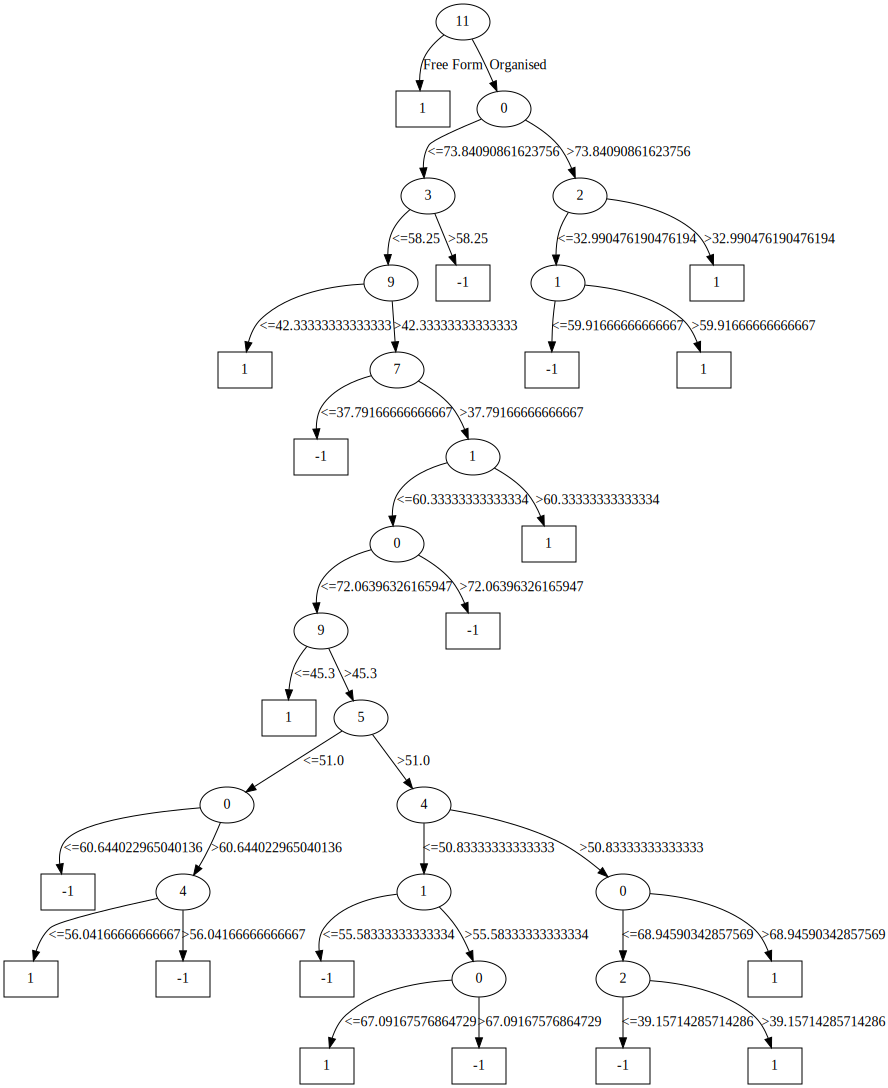

In [17]:
scores = []

for i in range(0, 10):
    test_set = sets[i]
    train_set = LabeledSet(13)
    for j in range(0, 10):
        if i != j:
            for k in range(0, sets[j].size()):
                train_set.addExample(sets[j].getX(k),sets[j].getY(k))
        
    arbre2.train(train_set)
    scores.append(arbre2.accuracy(test_set))

print("Moyenne du score : ", np.mean(np.array(scores)))
print("Ecart-type du score : ", np.std(np.array(scores)))

arbre2.plot()

In [364]:
taux_classification = 0

for i in range(10000):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']


        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            if not(w.empty or l.empty):
                break
        
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre2.racine.classifie(w)
    l_class = arbre2.racine.classifie(l)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class > l_class:
            taux_classification += 1

results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/10000*1.0)

Taux de bonne classification moyen :  0.3441


* #### K = 3 (bons/moyens/mauvais)

In [365]:
training_df3 = training_df.copy()

In [366]:
description3 = np.percentile(team_vectors_df['winning_ratio'], np.arange(0, 100, 33.4))

training_df3.loc[training_df3['winning_ratio'] >= description3[2] ,'label'] = 1
training_df3.loc[(training_df3['winning_ratio'] >= description3[1]) & (training_df3['winning_ratio'] < description3[2]) ,'label'] = 2
training_df3.loc[training_df3['winning_ratio'] < description3[1] ,'label'] = 3

In [367]:
first_class3 = training_df3[training_df3['label'] == 1]
first_class3 = first_class3.set_index('team_api_id')
first_class3 = first_class3.drop(['label', 'winning_ratio'], axis=1)

second_class3 = training_df3[training_df3['label'] == 2]
second_class3 = second_class3.set_index('team_api_id')
second_class3 = second_class3.drop(['label', 'winning_ratio'], axis=1)

third_class3 = training_df3[training_df3['label'] == 3]
third_class3 = third_class3.set_index('team_api_id')
third_class3 = third_class3.drop(['label', 'winning_ratio'], axis=1)

In [368]:
first_vectors3 = first_class3.values[0:rounddown(len(first_class3))]
second_vectors3 = second_class3.values[0:rounddown(len(second_class3))]
third_vectors3 = third_class3.values[0:rounddown(len(third_class3))]

In [369]:
sets = []
d_first3 = 0
d_second3 = 0
d_third3 = 0

for i in range(10):
    tmp = LabeledSet(13)
    f_first3 = d_first3+int(0.1 * len(first_vectors3))-1
    f_second3 = d_second3+int(0.1 * len(second_vectors3))-1
    f_third3 = d_third3+int(0.1 * len(third_vectors3))-1
    
    for j in range(d_first3, f_first3):
        tmp.addExample(first_vectors3[j], 1)
    for j in range(d_second3, f_second3):
        tmp.addExample(second_vectors3[j], 2)
    for j in range(d_third3, f_third3):
        tmp.addExample(third_vectors3[j], 3)
    
    
    sets.append(tmp)
    d_first3 = f_first3 + 1
    d_second3 = f_second3 + 1   
    d_third3 = f_third3 + 1

In [370]:
arbre3 = ArbreDecision(0.0, [1,2,3]) 

Moyenne du score :  1.0
Ecart-type du score :  0.0


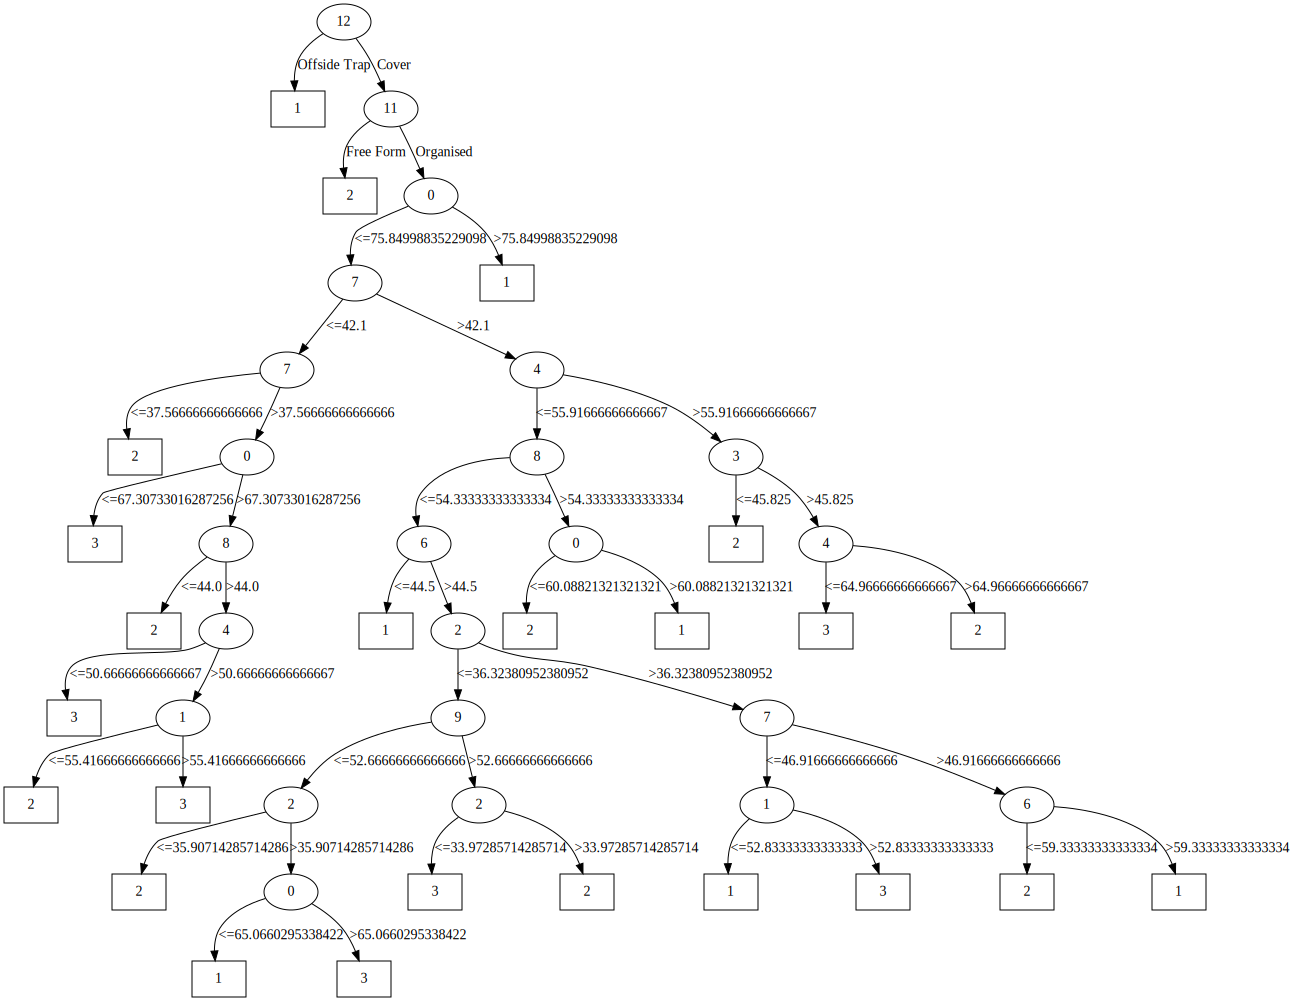

In [371]:
scores = []

for i in range(0, 10):
    test_set = sets[i]
    train_set = LabeledSet(13)
    for j in range(0, 10):
        if i != j:
            for k in range(0, sets[j].size()):
                train_set.addExample(sets[j].getX(k),sets[j].getY(k))
    arbre3.train(train_set)
    scores.append(arbre3.accuracy(test_set))

print("Moyenne du score : ", np.mean(np.array(scores)))
print("Ecart-type du score : ", np.std(np.array(scores)))
arbre3.plot()

In [372]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']

        #print(e1 , " contre ", e2, " : ", winner)
        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            if not(w.empty or l.empty):
                break
        
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre3.racine.classifie(w)
    l_class = arbre3.racine.classifie(l)

    #print("Classifications gagnant/perdant : ", w_class, l_class)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class > l_class:
            taux_classification += 1
            
results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.2797


* #### K = 4 (très bon/bon/mauvais/très mauvais)

In [373]:
training_df4 = training_df.copy()

In [374]:
d4 = team_vectors_df['winning_ratio'].describe()
first_quant4 = d4['25%'] 
median4 = d4['50%']
third_quant4 = d4['75%']

training_df4.loc[training_df4['winning_ratio'] >= third_quant4 ,'label'] = 1
training_df4.loc[(training_df4['winning_ratio'] >= median4) & (training_df4['winning_ratio'] < third_quant4) ,'label'] = 2
training_df4.loc[(training_df4['winning_ratio'] >= first_quant4) & (training_df4['winning_ratio'] < median4) ,'label'] = 3
training_df4.loc[training_df4['winning_ratio'] < first_quant4 ,'label'] = 4

In [375]:
first_class4 = training_df4[training_df4['label'] == 1]
first_class4 = first_class4.set_index('team_api_id')
first_class4 = first_class4.drop(['label', 'winning_ratio'], axis=1)

second_class4 = training_df4[training_df4['label'] == 2]
second_class4 = second_class4.set_index('team_api_id')
second_class4 = second_class4.drop(['label', 'winning_ratio'], axis=1)

third_class4 = training_df4[training_df4['label'] == 3]
third_class4 = third_class4.set_index('team_api_id')
third_class4 = third_class4.drop(['label', 'winning_ratio'], axis=1)

fourth_class4 = training_df4[training_df4['label'] == 4]
fourth_class4 = fourth_class4.set_index('team_api_id')
fourth_class4 = fourth_class4.drop(['label', 'winning_ratio'], axis=1)

In [376]:
first_vectors4 = first_class4.values[0:rounddown(len(first_class4))]
second_vectors4 = second_class4.values[0:rounddown(len(second_class4))]
third_vectors4 = third_class4.values[0:rounddown(len(third_class4))]
fourth_vectors4 = fourth_class4.values[0:rounddown(len(fourth_class4))]

In [377]:
sets = []
d_first4 = 0
d_second4 = 0
d_third4 = 0
d_fourth4 = 0

for i in range(10):
    tmp = LabeledSet(13)
    f_first4 = d_first4+int(0.1 * len(first_vectors4))-1
    f_second4 = d_second4+int(0.1 * len(second_vectors4))-1
    f_third4 = d_third4+int(0.1 * len(third_vectors4))-1
    f_fourth4 = d_fourth4+int(0.1 * len(fourth_vectors4))-1
    
    for j in range(d_first4, f_first4):
        tmp.addExample(first_vectors4[j], 1)
    for j in range(d_second4, f_second4):
        tmp.addExample(second_vectors4[j], 2)
    for j in range(d_third4, f_third4):
        tmp.addExample(third_vectors4[j], 3)
    for j in range(d_fourth4, f_fourth4):
        tmp.addExample(fourth_vectors4[j], 4)
    
    
    sets.append(tmp)
    d_first4 = f_first4 + 1
    d_second4 = f_second4 + 1   
    d_third4 = f_third4 + 1
    d_fourth4 = f_fourth4 + 1

In [378]:
arbre4 = ArbreDecision(0.0, [1,2,3,4]) 

Moyenne du score :  1.0
Ecart-type du score :  0.0


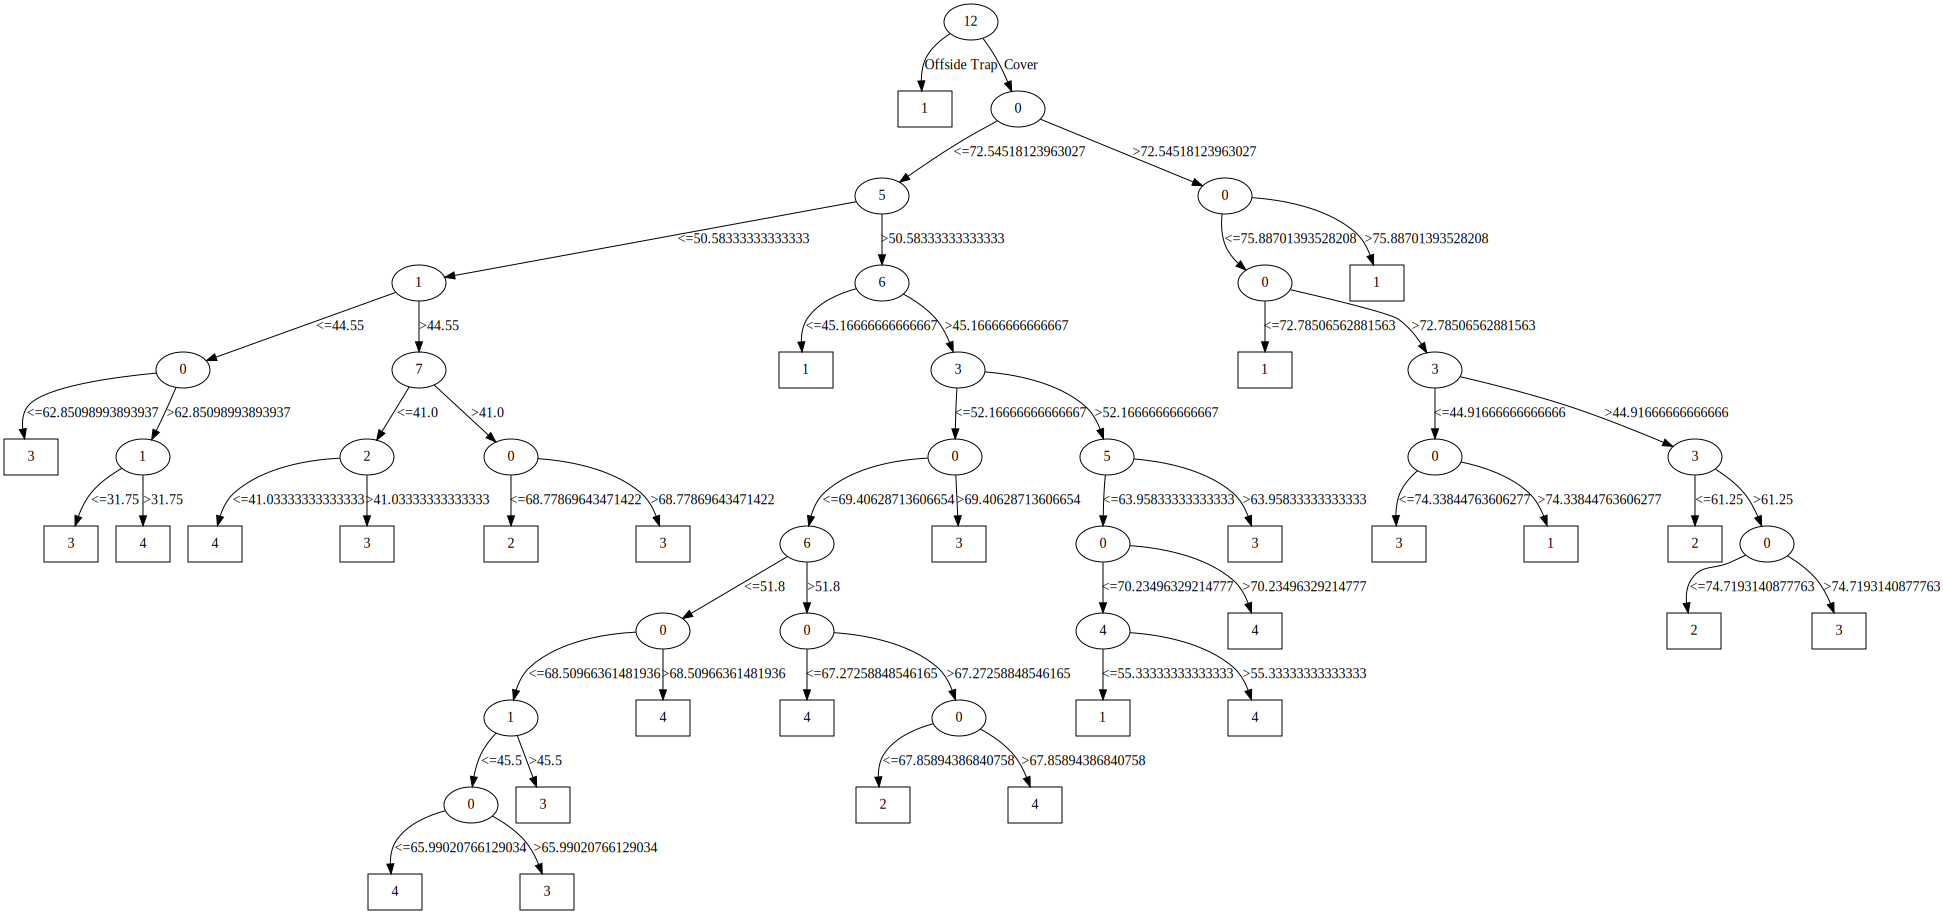

In [379]:
scores = []

for i in range(0, 10):
    test_set = sets[i]
    train_set = LabeledSet(13)
    for j in range(0, 10):
        if i != j:
            for k in range(0, sets[j].size()):
                train_set.addExample(sets[j].getX(k),sets[j].getY(k))
    arbre4.train(train_set)
    scores.append(arbre4.accuracy(test_set))

print("Moyenne du score : ", np.mean(np.array(scores)))
print("Ecart-type du score : ", np.std(np.array(scores)))

arbre4.plot()

Cependant, on décide d'omettre pour la suite cette étape de cross-validation. En effet, le nombre de classes devient trop grand et il n'y a pas assez d'exemples pour représenter chaque classe.

In [380]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']

        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            if not(w.empty or l.empty):
                break
        
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre4.racine.classifie(w)
    l_class = arbre4.racine.classifie(l)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class < l_class:
            taux_classification += 1

results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.4252


* #### K=6

In [381]:
training_df6 = training_df.copy()

In [382]:
description6 = np.percentile(team_vectors_df['winning_ratio'], np.arange(0, 100, 16.6))

training_df6.loc[training_df6['winning_ratio'] >= description6[5] ,'label'] = 1
training_df6.loc[(training_df6['winning_ratio'] >= description6[4]) & (training_df6['winning_ratio'] < description6[5]) ,'label'] = 2
training_df6.loc[(training_df6['winning_ratio'] >= description6[3]) & (training_df6['winning_ratio'] < description6[4]) ,'label'] = 3
training_df6.loc[(training_df6['winning_ratio'] >= description6[2]) & (training_df6['winning_ratio'] < description6[3]) ,'label'] = 4
training_df6.loc[(training_df6['winning_ratio'] >= description6[1]) & (training_df6['winning_ratio'] < description6[2]) ,'label'] = 5
training_df6.loc[training_df6['winning_ratio'] < description6[1] ,'label'] = 6

In [383]:
first_class6 = training_df6[training_df6['label'] == 1]
first_class6 = first_class6.set_index('team_api_id')
first_class6 = first_class6.drop(['label', 'winning_ratio'], axis=1)

second_class6 = training_df6[training_df6['label'] == 2]
second_class6 = second_class6.set_index('team_api_id')
second_class6 = second_class6.drop(['label', 'winning_ratio'], axis=1)

third_class6 = training_df6[training_df6['label'] == 3]
third_class6 = third_class6.set_index('team_api_id')
third_class6 = third_class6.drop(['label', 'winning_ratio'], axis=1)

fourth_class6 = training_df6[training_df6['label'] == 4]
fourth_class6 = fourth_class6.set_index('team_api_id')
fourth_class6 = fourth_class6.drop(['label', 'winning_ratio'], axis=1)

fifth_class6 = training_df6[training_df6['label'] == 5]
fifth_class6 = fifth_class6.set_index('team_api_id')
fifth_class6 = fifth_class6.drop(['label', 'winning_ratio'], axis=1)

sixth_class6 = training_df6[training_df6['label'] == 6]
sixth_class6 = sixth_class6.set_index('team_api_id')
sixth_class6 = sixth_class6.drop(['label', 'winning_ratio'], axis=1)

In [384]:
first_vectors6 = first_class6.values[0:rounddown(len(first_class6))]
second_vectors6 = second_class6.values[0:rounddown(len(second_class6))]
third_vectors6 = third_class6.values[0:rounddown(len(third_class6))]
fourth_vectors6 = fourth_class6.values[0:rounddown(len(fourth_class6))]
fifth_vectors6 = fifth_class6.values[0:rounddown(len(fifth_class6))]
sixth_vectors6 = sixth_class6.values[0:rounddown(len(sixth_class6))]

In [385]:
training_set6 = LabeledSet(13)
test_set6 = LabeledSet(13)

for j in range(0, int(0.7 * len(first_vectors6))):
    training_set6.addExample(first_vectors6[j], 1)
for j in range(0, int(0.7 * len(second_vectors6))):
    training_set6.addExample(second_vectors6[j], 2)
for j in range(0, int(0.7 * len(third_vectors6))):
    training_set6.addExample(third_vectors6[j], 3)
for j in range(0, int(0.7 * len(fourth_vectors6))):
    training_set6.addExample(fourth_vectors6[j], 4)
for j in range(0, int(0.7 * len(fifth_vectors6))):
    training_set6.addExample(fifth_vectors6[j], 5)
for j in range(0, int(0.7 * len(sixth_vectors6))):
    training_set6.addExample(sixth_vectors6[j], 6)

    
for j in range(int(0.7 * len(first_vectors6))+1, len(first_vectors6)):
    test_set6.addExample(first_vectors6[j], 1)
for j in range(int(0.7 * len(second_vectors6))+1, len(second_vectors6)):
    test_set6.addExample(second_vectors6[j], 2)
for j in range(int(0.7 * len(third_vectors6))+1, len(third_vectors6)):
    test_set6.addExample(third_vectors6[j], 3)
for j in range(int(0.7 * len(fourth_vectors6))+1, len(fourth_vectors6)):
    test_set6.addExample(fourth_vectors6[j], 4)
for j in range(int(0.7 * len(fifth_vectors6))+1, len(fifth_vectors6)):
    test_set6.addExample(fifth_vectors6[j], 5)
for j in range(int(0.7 * len(sixth_vectors6))+1, len(sixth_vectors6)):
    test_set6.addExample(sixth_vectors6[j], 6)   

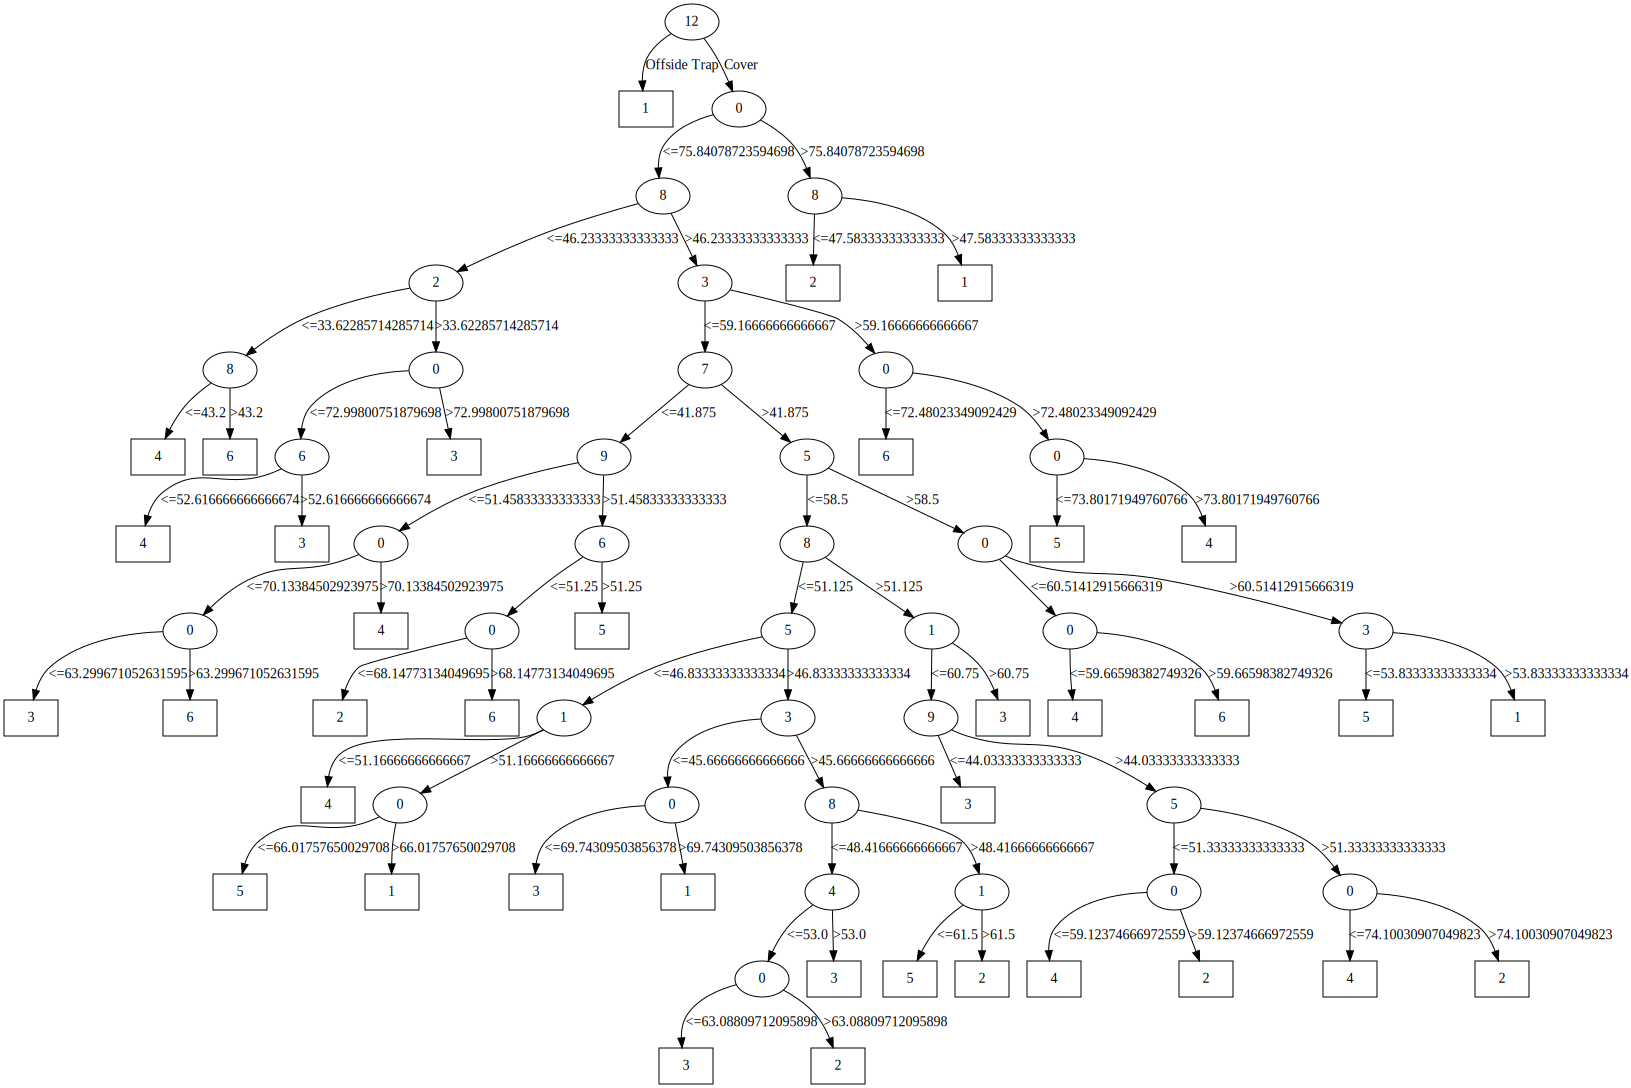

In [386]:
arbre6 = ArbreDecision(0.0, [1,2,3,4,5,6,7,8]) 

arbre6.train(training_set6)
arbre6.accuracy(test_set6)

arbre6.plot()

In [387]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']
        
        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]  
            if not(w.empty or l.empty):
                break
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre6.racine.classifie(w)
    l_class = arbre6.racine.classifie(l)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class < l_class:
            taux_classification += 1
            
results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.4169


* #### K=7 (excellents/très bons/ bons/ moyens/ mauvais/ très mauvais/ losers)

In [388]:
training_df7 = training_df.copy()

description7 = np.percentile(team_vectors_df['winning_ratio'], np.arange(0, 100, 14.286))

training_df7.loc[training_df7['winning_ratio'] >= description7[6] ,'label'] = 1
training_df7.loc[(training_df7['winning_ratio'] >= description7[5]) & (training_df7['winning_ratio'] < description7[6]) ,'label'] = 2
training_df7.loc[(training_df7['winning_ratio'] >= description7[4]) & (training_df7['winning_ratio'] < description7[5]) ,'label'] = 3
training_df7.loc[(training_df7['winning_ratio'] >= description7[3]) & (training_df7['winning_ratio'] < description7[4]) ,'label'] = 4
training_df7.loc[(training_df7['winning_ratio'] >= description7[2]) & (training_df7['winning_ratio'] < description7[3]) ,'label'] = 5
training_df7.loc[(training_df7['winning_ratio'] >= description7[1]) & (training_df7['winning_ratio'] < description7[2]) ,'label'] = 6
training_df7.loc[training_df7['winning_ratio'] < description7[1] ,'label'] = 7

In [389]:
first_class7 = training_df7[training_df7['label'] == 1]
first_class7 = first_class7.set_index('team_api_id')
first_class7 = first_class7.drop(['label', 'winning_ratio'], axis=1)

second_class7 = training_df7[training_df7['label'] == 2]
second_class7 = second_class7.set_index('team_api_id')
second_class7 = second_class7.drop(['label', 'winning_ratio'], axis=1)

third_class7 = training_df7[training_df7['label'] == 3]
third_class7 = third_class7.set_index('team_api_id')
third_class7 = third_class7.drop(['label', 'winning_ratio'], axis=1)

fourth_class7 = training_df7[training_df7['label'] == 4]
fourth_class7 = fourth_class7.set_index('team_api_id')
fourth_class7 = fourth_class7.drop(['label', 'winning_ratio'], axis=1)

fifth_class7 = training_df7[training_df7['label'] == 5]
fifth_class7 = fifth_class7.set_index('team_api_id')
fifth_class7 = fifth_class7.drop(['label', 'winning_ratio'], axis=1)

sixth_class7 = training_df7[training_df7['label'] == 6]
sixth_class7 = sixth_class7.set_index('team_api_id')
sixth_class7 = sixth_class7.drop(['label', 'winning_ratio'], axis=1)

seventh_class7 = training_df7[training_df7['label'] == 7]
seventh_class7 = seventh_class7.set_index('team_api_id')
seventh_class7 = seventh_class7.drop(['label', 'winning_ratio'], axis=1)

In [390]:
first_vectors7 = first_class7.values[0:rounddown(len(first_class7))]
second_vectors7 = second_class7.values[0:rounddown(len(second_class7))]
third_vectors7 = third_class7.values[0:rounddown(len(third_class7))]
fourth_vectors7 = fourth_class7.values[0:rounddown(len(fourth_class7))]
fifth_vectors7 = fifth_class7.values[0:rounddown(len(fifth_class7))]
sixth_vectors7 = sixth_class7.values[0:rounddown(len(sixth_class7))]
seventh_vectors7 = seventh_class7.values[0:rounddown(len(seventh_class7))]

In [391]:
training_set7 = LabeledSet(13)
test_set7 = LabeledSet(13)

for j in range(0, int(0.7 * len(first_vectors7))):
    training_set7.addExample(first_vectors7[j], 1)
for j in range(0, int(0.7 * len(second_vectors7))):
    training_set7.addExample(second_vectors7[j], 2)
for j in range(0, int(0.7 * len(third_vectors7))):
    training_set7.addExample(third_vectors7[j], 3)
for j in range(0, int(0.7 * len(fourth_vectors7))):
    training_set7.addExample(fourth_vectors7[j], 4)
for j in range(0, int(0.7 * len(fifth_vectors7))):
    training_set7.addExample(fifth_vectors7[j], 5)
for j in range(0, int(0.7 * len(sixth_vectors7))):
    training_set7.addExample(sixth_vectors7[j], 6)
for j in range(0, int(0.7 * len(seventh_vectors7))):
    training_set7.addExample(seventh_vectors7[j], 7)

for j in range(int(0.7 * len(first_vectors7))+1, len(first_vectors7)):
    test_set7.addExample(first_vectors7[j], 1)
for j in range(int(0.7 * len(second_vectors7))+1, len(second_vectors7)):
    test_set7.addExample(second_vectors7[j], 2)
for j in range(int(0.7 * len(third_vectors7))+1, len(third_vectors7)):
    test_set7.addExample(third_vectors7[j], 3)
for j in range(int(0.7 * len(fourth_vectors7))+1, len(fourth_vectors7)):
    test_set7.addExample(fourth_vectors7[j], 4)
for j in range(int(0.7 * len(fifth_vectors7))+1, len(fifth_vectors7)):
    test_set7.addExample(fifth_vectors7[j], 5)
for j in range(int(0.7 * len(sixth_vectors7))+1, len(sixth_vectors7)):
    test_set7.addExample(sixth_vectors7[j], 6)
for j in range(int(0.7 * len(seventh_vectors7))+1, len(seventh_vectors7)):
    test_set7.addExample(seventh_vectors7[j], 7)

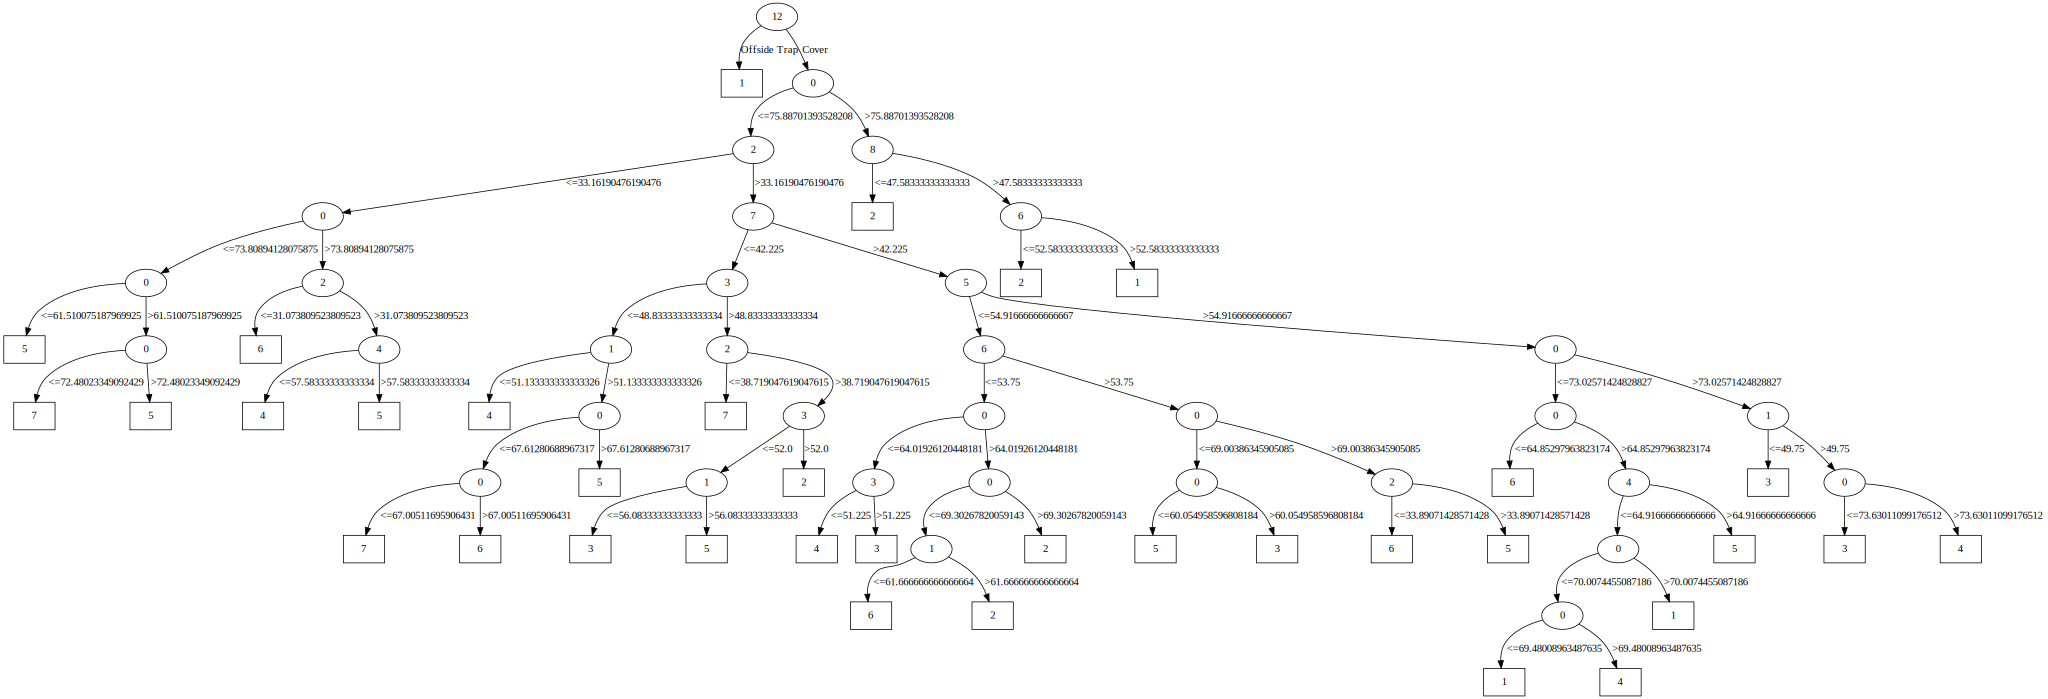

In [392]:
arbre7 = ArbreDecision(0.0, [1,2,3,4,5,6,7]) 

arbre7.train(training_set7)
arbre7.accuracy(test_set7)

arbre7.plot()

In [393]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']
        
        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]  
            if not(w.empty or l.empty):
                break
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre7.racine.classifie(w)
    l_class = arbre7.racine.classifie(l)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class < l_class:
            taux_classification += 1

results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.4415


* #### K=8 (champions/excellents/très bons/ bons/ moyens/ mauvais/ très mauvais/ losers)

In [394]:
training_df8 = training_df.copy()

In [395]:
description8 = np.percentile(team_vectors_df['winning_ratio'], np.arange(0, 100, 12.5))

training_df8.loc[training_df8['winning_ratio'] >= description8[7] ,'label'] = 1
training_df8.loc[(training_df8['winning_ratio'] >= description8[6]) & (training_df8['winning_ratio'] < description8[7]) ,'label'] = 2
training_df8.loc[(training_df8['winning_ratio'] >= description8[5]) & (training_df8['winning_ratio'] < description8[6]) ,'label'] = 3
training_df8.loc[(training_df8['winning_ratio'] >= description8[4]) & (training_df8['winning_ratio'] < description8[5]) ,'label'] = 4
training_df8.loc[(training_df8['winning_ratio'] >= description8[3]) & (training_df8['winning_ratio'] < description8[4]) ,'label'] = 5
training_df8.loc[(training_df8['winning_ratio'] >= description8[2]) & (training_df8['winning_ratio'] < description8[3]) ,'label'] = 6
training_df8.loc[(training_df8['winning_ratio'] >= description8[1]) & (training_df8['winning_ratio'] < description8[2]) ,'label'] = 7
training_df8.loc[training_df8['winning_ratio'] < description8[1] ,'label'] = 8

In [396]:
first_class8 = training_df8[training_df8['label'] == 1]
first_class8 = first_class8.set_index('team_api_id')
first_class8 = first_class8.drop(['label', 'winning_ratio'], axis=1)

second_class8 = training_df8[training_df8['label'] == 2]
second_class8 = second_class8.set_index('team_api_id')
second_class8 = second_class8.drop(['label', 'winning_ratio'], axis=1)

third_class8 = training_df8[training_df8['label'] == 3]
third_class8 = third_class8.set_index('team_api_id')
third_class8 = third_class8.drop(['label', 'winning_ratio'], axis=1)

fourth_class8 = training_df8[training_df8['label'] == 4]
fourth_class8 = fourth_class8.set_index('team_api_id')
fourth_class8 = fourth_class8.drop(['label', 'winning_ratio'], axis=1)

fifth_class8 = training_df8[training_df8['label'] == 5]
fifth_class8 = fifth_class8.set_index('team_api_id')
fifth_class8 = fifth_class8.drop(['label', 'winning_ratio'], axis=1)

sixth_class8 = training_df8[training_df8['label'] == 6]
sixth_class8 = sixth_class8.set_index('team_api_id')
sixth_class8 = sixth_class8.drop(['label', 'winning_ratio'], axis=1)

seventh_class8 = training_df8[training_df8['label'] == 7]
seventh_class8 = seventh_class8.set_index('team_api_id')
seventh_class8 = seventh_class8.drop(['label', 'winning_ratio'], axis=1)

eigth_class8 = training_df8[training_df8['label'] == 8]
eigth_class8 = eigth_class8.set_index('team_api_id')
eigth_class8 = eigth_class8.drop(['label', 'winning_ratio'], axis=1)

In [397]:
first_vectors8 = first_class8.values[0:rounddown(len(first_class8))]
second_vectors8 = second_class8.values[0:rounddown(len(second_class8))]
third_vectors8 = third_class8.values[0:rounddown(len(third_class8))]
fourth_vectors8 = fourth_class8.values[0:rounddown(len(fourth_class8))]
fifth_vectors8 = fifth_class8.values[0:rounddown(len(fifth_class8))]
sixth_vectors8 = sixth_class8.values[0:rounddown(len(sixth_class8))]
seventh_vectors8 = seventh_class8.values[0:rounddown(len(seventh_class8))]
eight_vectors8 = eigth_class8.values[0:rounddown(len(eigth_class8))]

In [398]:
training_set8 = LabeledSet(13)
test_set8 = LabeledSet(13)

for j in range(0, int(0.7 * len(first_vectors8))):
    training_set8.addExample(first_vectors8[j], 1)
for j in range(0, int(0.7 * len(second_vectors8))):
    training_set8.addExample(second_vectors8[j], 2)
for j in range(0, int(0.7 * len(third_vectors8))):
    training_set8.addExample(third_vectors8[j], 3)
for j in range(0, int(0.7 * len(fourth_vectors8))):
    training_set8.addExample(fourth_vectors8[j], 4)
for j in range(0, int(0.7 * len(fifth_vectors8))):
    training_set8.addExample(fifth_vectors8[j], 5)
for j in range(0, int(0.7 * len(sixth_vectors8))):
    training_set8.addExample(sixth_vectors8[j], 6)
for j in range(0, int(0.7 * len(seventh_vectors8))):
    training_set8.addExample(seventh_vectors8[j], 7)
for j in range(0, int(0.7 * len(eight_vectors8))):
    training_set8.addExample(eight_vectors8[j], 8)
    
for j in range(int(0.7 * len(first_vectors8))+1, len(first_vectors8)):
    test_set8.addExample(first_vectors8[j], 1)
for j in range(int(0.7 * len(second_vectors8))+1, len(second_vectors8)):
    test_set8.addExample(second_vectors8[j], 2)
for j in range(int(0.7 * len(third_vectors8))+1, len(third_vectors8)):
    test_set8.addExample(third_vectors8[j], 3)
for j in range(int(0.7 * len(fourth_vectors8))+1, len(fourth_vectors8)):
    test_set8.addExample(fourth_vectors8[j], 4)
for j in range(int(0.7 * len(fifth_vectors8))+1, len(fifth_vectors8)):
    test_set8.addExample(fifth_vectors8[j], 5)
for j in range(int(0.7 * len(sixth_vectors8))+1, len(sixth_vectors8)):
    test_set8.addExample(sixth_vectors8[j], 6)
for j in range(int(0.7 * len(seventh_vectors8))+1, len(seventh_vectors8)):
    test_set8.addExample(seventh_vectors8[j], 7)
for j in range(int(0.7 * len(eight_vectors8))+1, len(eight_vectors8)):
    test_set8.addExample(eight_vectors8[j], 8)    

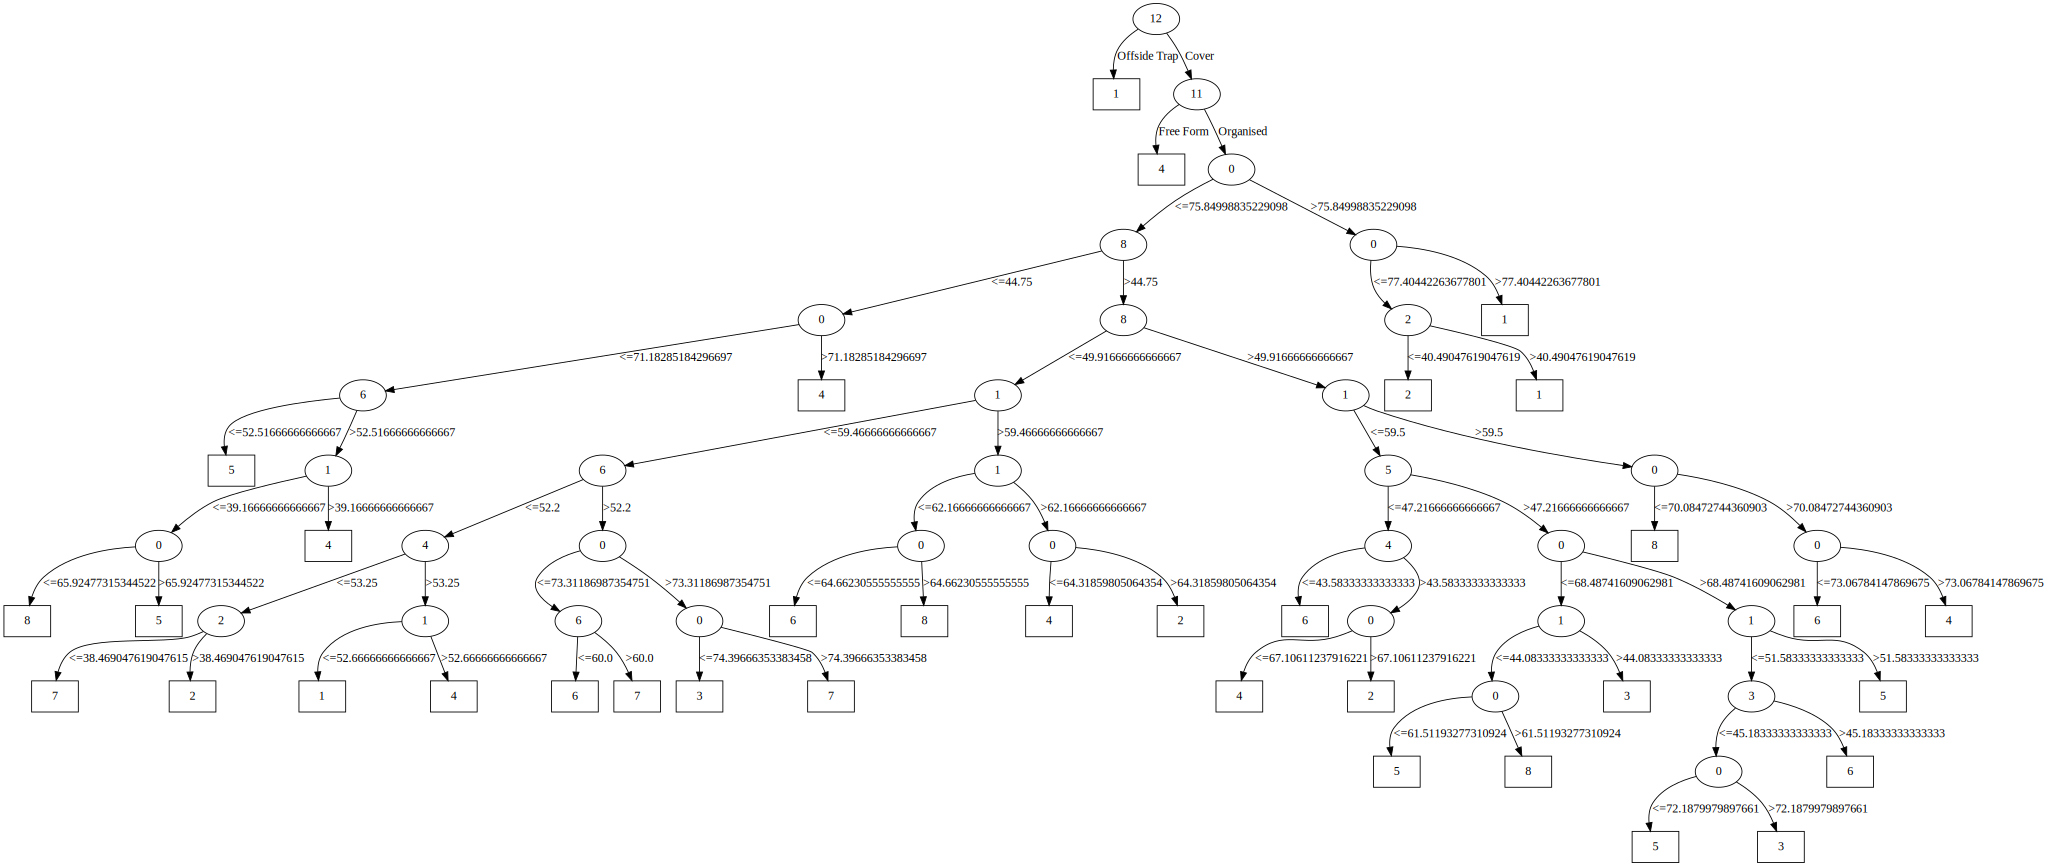

In [399]:
arbre8 = ArbreDecision(0.0, [1,2,3,4,5,6,7,8]) 

arbre8.train(training_set8)
arbre8.accuracy(test_set8)

arbre8.plot()

In [400]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']
        
        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]  
            if not(w.empty or l.empty):
                break
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre8.racine.classifie(w)
    l_class = arbre8.racine.classifie(l)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class < l_class:
            taux_classification += 1

results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.4065


* #### K=9 (champions/excellents/très bons/ bons/ moyens/ mauvais/ très mauvais/ terribles/ losers)

In [401]:
training_df9 = training_df.copy()

In [402]:
description9 = np.percentile(team_vectors_df['winning_ratio'], np.arange(0, 100, 11.1))

training_df9.loc[training_df9['winning_ratio'] >= description9[8] ,'label'] = 1
training_df9.loc[(training_df9['winning_ratio'] >= description9[7]) & (training_df9['winning_ratio'] < description9[8]) ,'label'] = 2
training_df9.loc[(training_df9['winning_ratio'] >= description9[6]) & (training_df9['winning_ratio'] < description9[7]) ,'label'] = 3
training_df9.loc[(training_df9['winning_ratio'] >= description9[5]) & (training_df9['winning_ratio'] < description9[6]) ,'label'] = 4
training_df9.loc[(training_df9['winning_ratio'] >= description9[4]) & (training_df9['winning_ratio'] < description9[5]) ,'label'] = 5
training_df9.loc[(training_df9['winning_ratio'] >= description9[3]) & (training_df9['winning_ratio'] < description9[4]) ,'label'] = 6
training_df9.loc[(training_df9['winning_ratio'] >= description9[2]) & (training_df9['winning_ratio'] < description9[3]) ,'label'] = 7
training_df9.loc[(training_df9['winning_ratio'] >= description9[1]) & (training_df9['winning_ratio'] < description9[2]) ,'label'] = 8
training_df9.loc[training_df9['winning_ratio'] < description9[1] ,'label'] = 9

In [403]:
first_class9 = training_df9[training_df9['label'] == 1]
first_class9 = first_class9.set_index('team_api_id')
first_class9 = first_class9.drop(['label', 'winning_ratio'], axis=1)

second_class9 = training_df9[training_df9['label'] == 2]
second_class9 = second_class9.set_index('team_api_id')
second_class9 = second_class9.drop(['label', 'winning_ratio'], axis=1)

third_class9 = training_df9[training_df9['label'] == 3]
third_class9 = third_class9.set_index('team_api_id')
third_class9 = third_class9.drop(['label', 'winning_ratio'], axis=1)

fourth_class9 = training_df9[training_df9['label'] == 4]
fourth_class9 = fourth_class9.set_index('team_api_id')
fourth_class9 = fourth_class9.drop(['label', 'winning_ratio'], axis=1)

fifth_class9 = training_df9[training_df9['label'] == 5]
fifth_class9 = fifth_class9.set_index('team_api_id')
fifth_class9 = fifth_class9.drop(['label', 'winning_ratio'], axis=1)

sixth_class9 = training_df9[training_df9['label'] == 6]
sixth_class9 = sixth_class9.set_index('team_api_id')
sixth_class9 = sixth_class9.drop(['label', 'winning_ratio'], axis=1)

seventh_class9 = training_df9[training_df9['label'] == 7]
seventh_class9 = seventh_class9.set_index('team_api_id')
seventh_class9 = seventh_class9.drop(['label', 'winning_ratio'], axis=1)

eigth_class9 = training_df9[training_df9['label'] == 8]
eigth_class9 = eigth_class9.set_index('team_api_id')
eigth_class9 = eigth_class9.drop(['label', 'winning_ratio'], axis=1)

ninth_class9 = training_df9[training_df9['label'] == 9]
ninth_class9 = ninth_class9.set_index('team_api_id')
ninth_class9 = ninth_class9.drop(['label', 'winning_ratio'], axis=1)

In [404]:
first_vectors9 = first_class9.values[0:rounddown(len(first_class9))]
second_vectors9 = second_class9.values[0:rounddown(len(second_class9))]
third_vectors9 = third_class9.values[0:rounddown(len(third_class9))]
fourth_vectors9 = fourth_class9.values[0:rounddown(len(fourth_class9))]
fifth_vectors9 = fifth_class9.values[0:rounddown(len(fifth_class9))]
sixth_vectors9 = sixth_class9.values[0:rounddown(len(sixth_class9))]
seventh_vectors9 = seventh_class9.values[0:rounddown(len(seventh_class9))]
eight_vectors9 = eigth_class9.values[0:rounddown(len(eigth_class9))]
ninth_vectors9 = ninth_class9.values[0:rounddown(len(ninth_class9))]

In [405]:
training_set9 = LabeledSet(13)
test_set9 = LabeledSet(13)

for j in range(0, int(0.7 * len(first_vectors9))):
    training_set9.addExample(first_vectors9[j], 1)
for j in range(0, int(0.7 * len(second_vectors9))):
    training_set9.addExample(second_vectors9[j], 2)
for j in range(0, int(0.7 * len(third_vectors9))):
    training_set9.addExample(third_vectors9[j], 3)
for j in range(0, int(0.7 * len(fourth_vectors9))):
    training_set9.addExample(fourth_vectors9[j], 4)
for j in range(0, int(0.7 * len(fifth_vectors9))):
    training_set9.addExample(fifth_vectors9[j], 5)
for j in range(0, int(0.7 * len(sixth_vectors9))):
    training_set9.addExample(sixth_vectors9[j], 6)
for j in range(0, int(0.7 * len(seventh_vectors9))):
    training_set9.addExample(seventh_vectors9[j], 7)
for j in range(0, int(0.7 * len(eight_vectors9))):
    training_set9.addExample(eight_vectors9[j], 9)
    
for j in range(int(0.7 * len(first_vectors9))+1, len(first_vectors9)):
    test_set9.addExample(first_vectors9[j], 1)
for j in range(int(0.7 * len(second_vectors9))+1, len(second_vectors9)):
    test_set9.addExample(second_vectors9[j], 2)
for j in range(int(0.7 * len(third_vectors9))+1, len(third_vectors9)):
    test_set9.addExample(third_vectors9[j], 3)
for j in range(int(0.7 * len(fourth_vectors9))+1, len(fourth_vectors9)):
    test_set9.addExample(fourth_vectors9[j], 4)
for j in range(int(0.7 * len(fifth_vectors9))+1, len(fifth_vectors9)):
    test_set9.addExample(fifth_vectors9[j], 5)
for j in range(int(0.7 * len(sixth_vectors9))+1, len(sixth_vectors9)):
    test_set9.addExample(sixth_vectors9[j], 6)
for j in range(int(0.7 * len(seventh_vectors9))+1, len(seventh_vectors9)):
    test_set9.addExample(seventh_vectors9[j], 7)
for j in range(int(0.7 * len(eight_vectors9))+1, len(eight_vectors9)):
    test_set9.addExample(eight_vectors9[j], 8)
for j in range(int(0.7 * len(ninth_vectors9))+1, len(ninth_vectors9)):
    test_set9.addExample(ninth_vectors9[j], 9)        

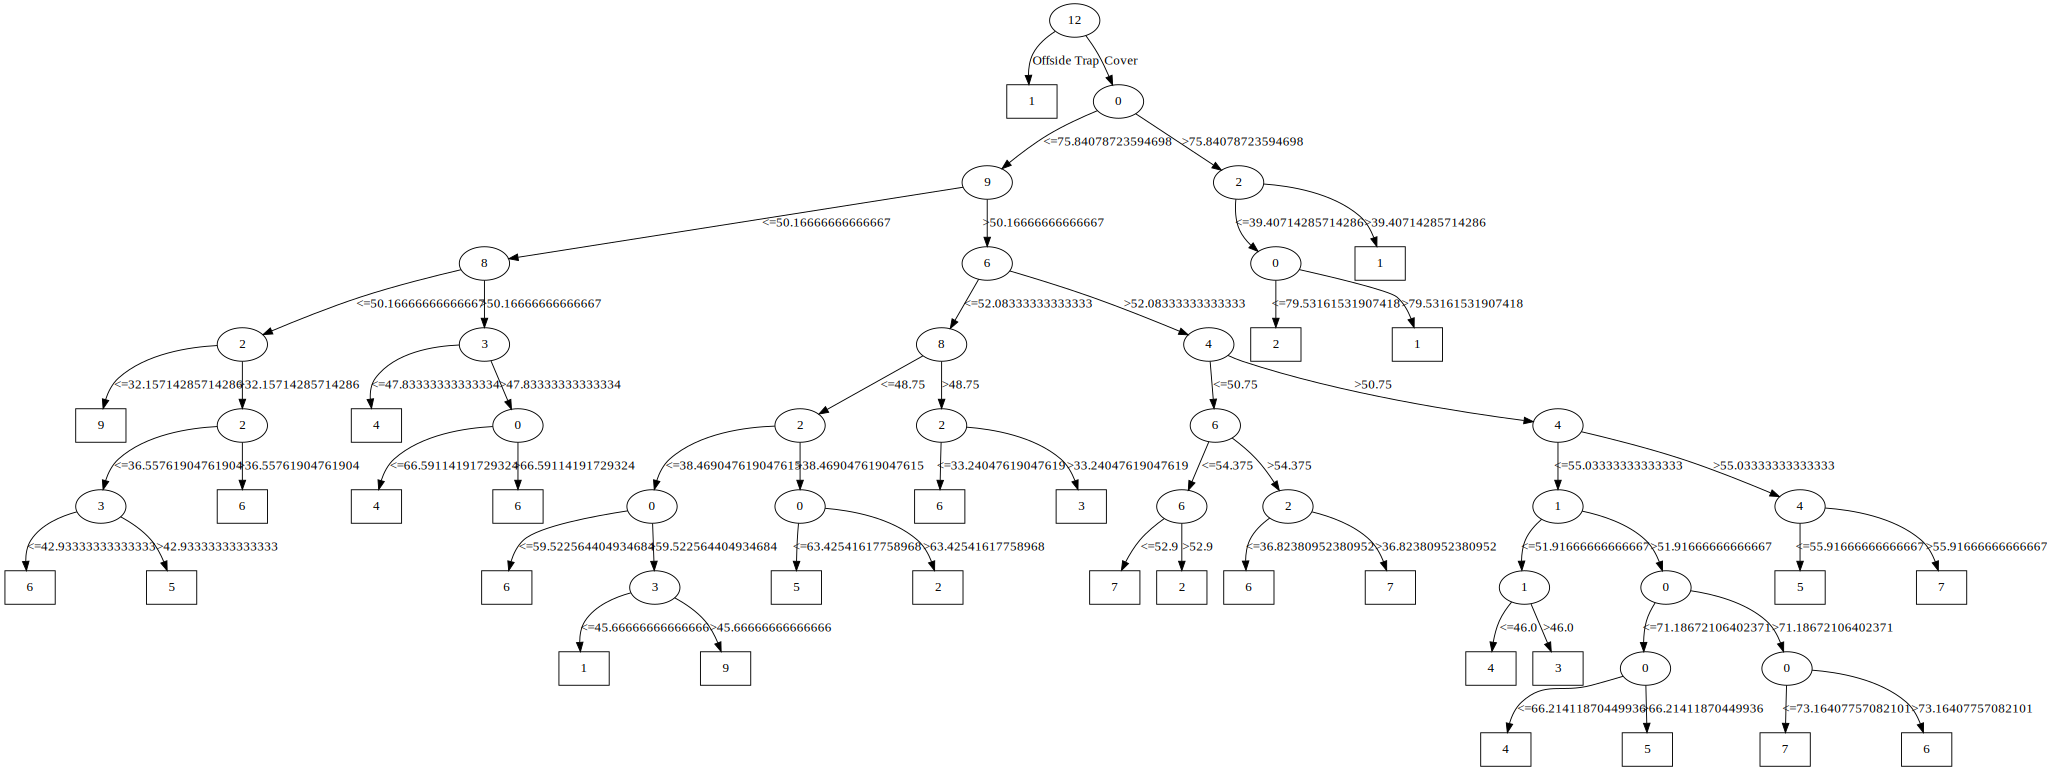

In [406]:
arbre9 = ArbreDecision(0.0, [1,2,3,4,5,6,7,8,9]) 

arbre9.train(training_set9)
arbre9.accuracy(test_set9)

arbre9.plot()

In [407]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']
        
        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]  
            if not(w.empty or l.empty):
                break
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre9.racine.classifie(w)
    l_class = arbre9.racine.classifie(l)
    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class < l_class:
            taux_classification += 1

results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.4317


* #### K = 10

In [408]:
training_df10 = training_df.copy()

In [409]:
description10 = np.percentile(team_vectors_df['winning_ratio'], np.arange(0, 100, 10))

training_df10.loc[training_df10['winning_ratio'] >= description10[9] ,'label'] = 1
training_df10.loc[(training_df10['winning_ratio'] >= description10[8]) & (training_df10['winning_ratio'] < description10[9]) ,'label'] = 2
training_df10.loc[(training_df10['winning_ratio'] >= description10[7]) & (training_df10['winning_ratio'] < description10[8]) ,'label'] = 3
training_df10.loc[(training_df10['winning_ratio'] >= description10[6]) & (training_df10['winning_ratio'] < description10[7]) ,'label'] = 4
training_df10.loc[(training_df10['winning_ratio'] >= description10[5]) & (training_df10['winning_ratio'] < description10[6]) ,'label'] = 5
training_df10.loc[(training_df10['winning_ratio'] >= description10[4]) & (training_df10['winning_ratio'] < description10[5]) ,'label'] = 6
training_df10.loc[(training_df10['winning_ratio'] >= description10[3]) & (training_df10['winning_ratio'] < description10[4]) ,'label'] = 7
training_df10.loc[(training_df10['winning_ratio'] >= description10[2]) & (training_df10['winning_ratio'] < description10[3]) ,'label'] = 8
training_df10.loc[(training_df10['winning_ratio'] >= description10[1]) & (training_df10['winning_ratio'] < description10[2]) ,'label'] = 9
training_df10.loc[training_df10['winning_ratio'] < description10[1] ,'label'] = 10

In [410]:
first_class10 = training_df10[training_df10['label'] == 1]
first_class10 = first_class10.set_index('team_api_id')
first_class10 = first_class10.drop(['label', 'winning_ratio'], axis=1)

second_class10 = training_df10[training_df10['label'] == 2]
second_class10 = second_class10.set_index('team_api_id')
second_class10 = second_class10.drop(['label', 'winning_ratio'], axis=1)

third_class10 = training_df10[training_df10['label'] == 3]
third_class10 = third_class10.set_index('team_api_id')
third_class10 = third_class10.drop(['label', 'winning_ratio'], axis=1)

fourth_class10 = training_df10[training_df10['label'] == 4]
fourth_class10 = fourth_class10.set_index('team_api_id')
fourth_class10 = fourth_class10.drop(['label', 'winning_ratio'], axis=1)

fifth_class10 = training_df10[training_df10['label'] == 5]
fifth_class10 = fifth_class10.set_index('team_api_id')
fifth_class10 = fifth_class10.drop(['label', 'winning_ratio'], axis=1)

sixth_class10 = training_df10[training_df10['label'] == 6]
sixth_class10 = sixth_class10.set_index('team_api_id')
sixth_class10 = sixth_class10.drop(['label', 'winning_ratio'], axis=1)

seventh_class10 = training_df10[training_df10['label'] == 7]
seventh_class10 = seventh_class10.set_index('team_api_id')
seventh_class10 = seventh_class10.drop(['label', 'winning_ratio'], axis=1)

eigth_class10 = training_df10[training_df10['label'] == 8]
eigth_class10 = eigth_class10.set_index('team_api_id')
eigth_class10 = eigth_class10.drop(['label', 'winning_ratio'], axis=1)

ninth_class10 = training_df10[training_df10['label'] == 9]
ninth_class10 = ninth_class10.set_index('team_api_id')
ninth_class10 = ninth_class10.drop(['label', 'winning_ratio'], axis=1)

tenth_class10 = training_df10[training_df10['label'] == 10]
tenth_class10 = tenth_class10.set_index('team_api_id')
tenth_class10 = tenth_class10.drop(['label', 'winning_ratio'], axis=1)

In [411]:
first_vectors10 = first_class10.values[0:rounddown(len(first_class10))]
second_vectors10 = second_class10.values[0:rounddown(len(second_class10))]
third_vectors10 = third_class10.values[0:rounddown(len(third_class10))]
fourth_vectors10 = fourth_class10.values[0:rounddown(len(fourth_class10))]
fifth_vectors10 = fifth_class10.values[0:rounddown(len(fifth_class10))]
sixth_vectors10 = sixth_class10.values[0:rounddown(len(sixth_class10))]
seventh_vectors10 = seventh_class10.values[0:rounddown(len(seventh_class10))]
eight_vectors10 = eigth_class10.values[0:rounddown(len(eigth_class10))]
ninth_vectors10 = ninth_class10.values[0:rounddown(len(ninth_class10))]
tenth_vectors10 = tenth_class10.values[0:rounddown(len(tenth_class10))]

In [412]:
training_set10 = LabeledSet(10)
test_set10 = LabeledSet(10)

for j in range(0, int(0.7 * len(first_vectors10))):
    training_set10.addExample(first_vectors10[j], 1)
for j in range(0, int(0.7 * len(second_vectors10))):
    training_set10.addExample(second_vectors10[j], 2)
for j in range(0, int(0.7 * len(third_vectors10))):
    training_set10.addExample(third_vectors10[j], 3)
for j in range(0, int(0.7 * len(fourth_vectors10))):
    training_set10.addExample(fourth_vectors10[j], 4)
for j in range(0, int(0.7 * len(fifth_vectors10))):
    training_set10.addExample(fifth_vectors10[j], 5)
for j in range(0, int(0.7 * len(sixth_vectors10))):
    training_set10.addExample(sixth_vectors10[j], 6)
for j in range(0, int(0.7 * len(seventh_vectors10))):
    training_set10.addExample(seventh_vectors10[j], 7)
for j in range(0, int(0.7 * len(eight_vectors10))):
    training_set10.addExample(eight_vectors10[j], 8)
for j in range(0, int(0.7 * len(ninth_vectors10))):
    training_set10.addExample(ninth_vectors10[j], 9)
for j in range(0, int(0.7 * len(tenth_vectors10))):
    training_set10.addExample(tenth_vectors10[j], 10)    
    
for j in range(int(0.7 * len(first_vectors10))+1, len(first_vectors10)):
    test_set10.addExample(first_vectors10[j], 1)
for j in range(int(0.7 * len(second_vectors10))+1, len(second_vectors10)):
    test_set10.addExample(second_vectors10[j], 2)
for j in range(int(0.7 * len(third_vectors10))+1, len(third_vectors10)):
    test_set10.addExample(third_vectors10[j], 3)
for j in range(int(0.7 * len(fourth_vectors10))+1, len(fourth_vectors10)):
    test_set10.addExample(fourth_vectors10[j], 4)
for j in range(int(0.7 * len(fifth_vectors10))+1, len(fifth_vectors10)):
    test_set10.addExample(fifth_vectors10[j], 5)
for j in range(int(0.7 * len(sixth_vectors10))+1, len(sixth_vectors10)):
    test_set10.addExample(sixth_vectors10[j], 6)
for j in range(int(0.7 * len(seventh_vectors10))+1, len(seventh_vectors10)):
    test_set10.addExample(seventh_vectors10[j], 7)
for j in range(int(0.7 * len(eight_vectors10))+1, len(eight_vectors10)):
    test_set10.addExample(eight_vectors10[j], 8)    
for j in range(int(0.7 * len(ninth_vectors10))+1, len(ninth_vectors10)):
    test_set10.addExample(ninth_vectors10[j], 9)
for j in range(int(0.7 * len(tenth_vectors10))+1, len(tenth_vectors10)):
    test_set10.addExample(tenth_vectors10[j], 10)

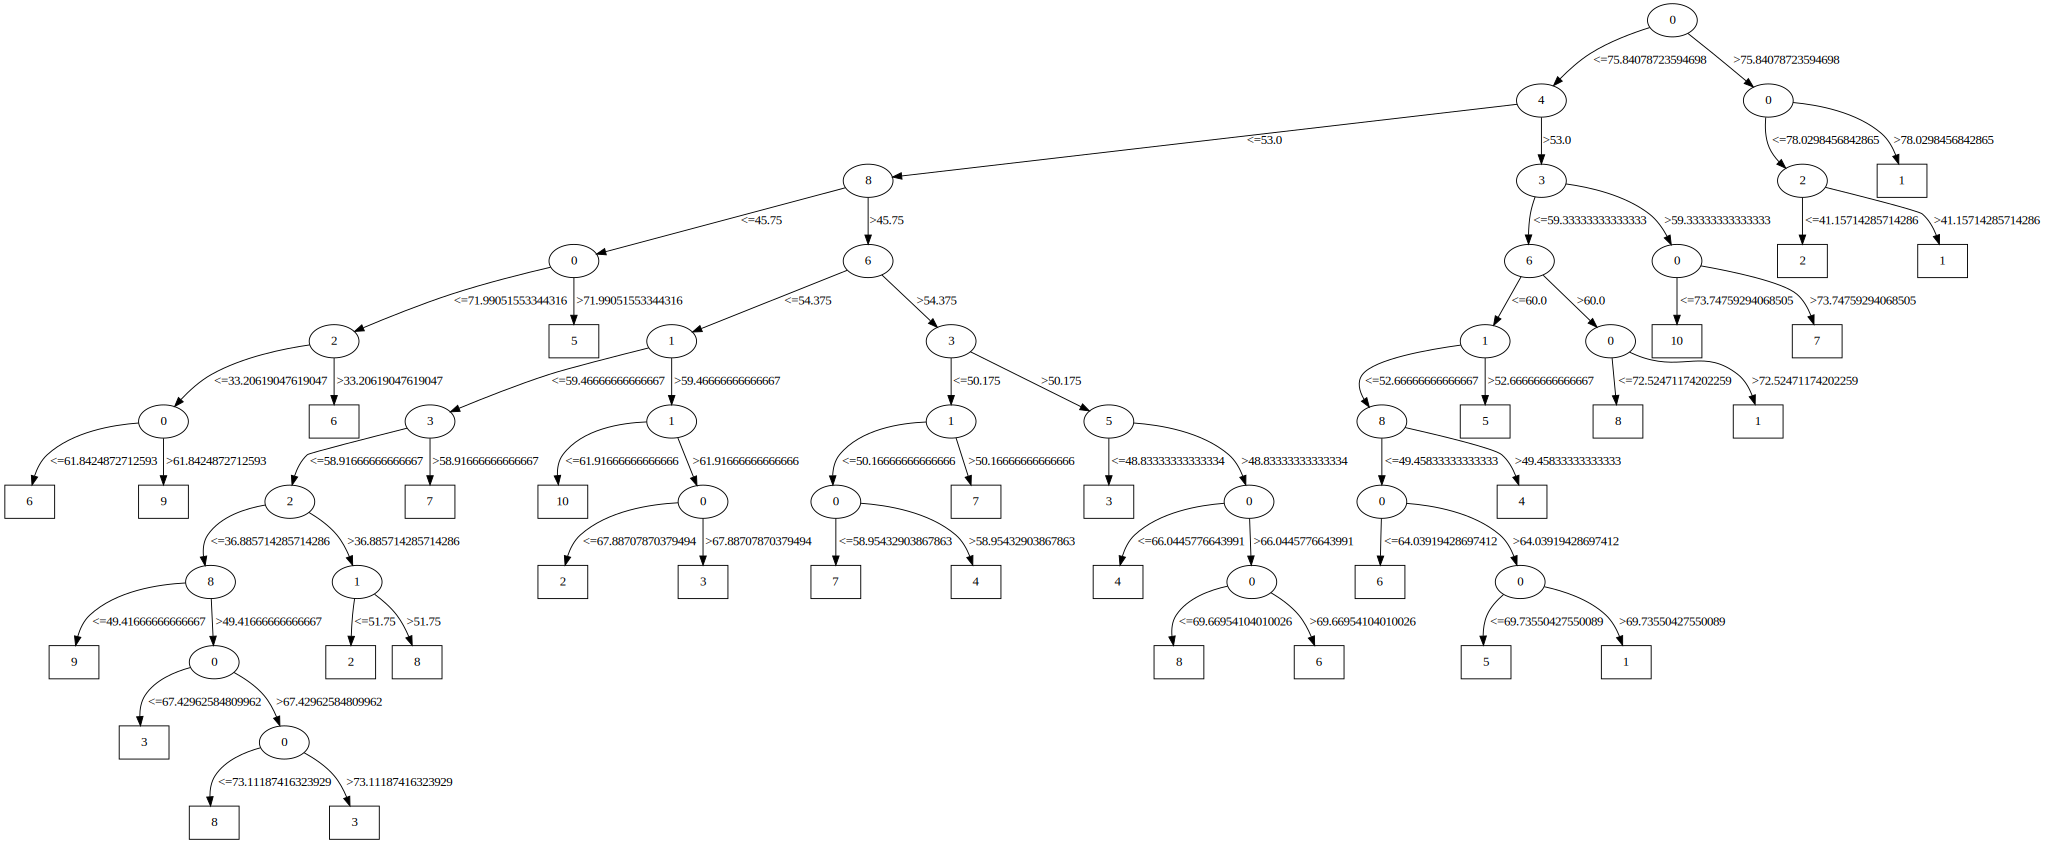

In [413]:
arbre10 = ArbreDecision(0.0, [1,2,3,4,5,6,7,8,9,10]) 
arbre10.train(training_set10)
arbre10.accuracy(test_set10)

arbre10.plot()

In [414]:
taux_classification = 0
n = 10000
for i in range(n):
    while True:
        indexes = match_pd.index
        i = random.choice(indexes)
        ex = match_pd.loc[i]

        e1 = ex['home_team_api_id']
        e2 = ex['away_team_api_id']
        winner = ex['winner']
        
        if pd.isnull(winner):
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]  
            if not(w.empty or l.empty):
                break
        if winner == e1: 
            w = team_vectors_df[team_vectors_df['team_api_id'] == e1]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e2]
        else:
            w = team_vectors_df[team_vectors_df['team_api_id'] == e2]
            l = team_vectors_df[team_vectors_df['team_api_id'] == e1]
        
        if not(w.empty or l.empty):
            break

    w = w.set_index('team_api_id')
    w = w.drop(['winning_ratio'], axis=1)

    l = l.set_index('team_api_id')
    l = l.drop(['winning_ratio'], axis=1)

    l = l.values[0]
    w = w.values[0]

    
    w_class = arbre10.racine.classifie(w)
    l_class = arbre10.racine.classifie(l)

    
    if pd.isnull(winner):
        if w_class == l_class:
            taux_classification += 1
    else:
        if w_class < l_class:
            taux_classification += 1
        
            
results.append(taux_classification/10000*1.0)
print("Taux de bonne classification moyen : ", taux_classification/n*1.0)

Taux de bonne classification moyen :  0.4384


## Partie 5 : Résultats

On trace l'évolution du taux d'accuracy moyen en fonction du nombre de classes par lesquels on partitionne les équipes.

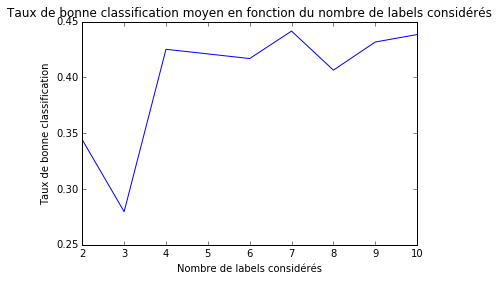

In [417]:
plt.plot(np.array([2, 3, 4, 6, 7, 8, 9, 10]), results)
plt.title("Taux de bonne classification moyen en fonction du nombre de labels considérés")
plt.xlabel("Nombre de labels considérés")
plt.ylabel("Taux de bonne classification")
plt.show()

## Partie 6 : Analyse

Les résulats obtenus avec K=7 confirment que le modèle d'apprentissage avec 7 classes est bien le plus performant, et en cohérence avec l'évaluation par index du clustering précédent.  

Cependant nos résultats ne dépassent pas 50% mais sont supérieurs à ce que l'on peut obtenir avec un classifieur aléatoire pour K>=4.  
Si on compare par rapport aux résultats obtenus par les bookmakers (53% d'accuracy), nos résultats restent inférieurs.  

La prédiction en fonction du niveau d'une équipe ne semble donc pas être une méthode intéressante à poursuivre. 
Cela pourrait s'expliquer par le peu de corrélation qui existe entre les caractéristiques des équipes et l'issue du match. De plus, le niveau pour chaque équipe est fixé de façon permanente dans le temps et non en fonction de l'année.  
Cela pourrait être une piste d'amélioration de notre modèle.